<a href="https://colab.research.google.com/github/Ram060299/Heart-Sound-Processing-via-xLSTM/blob/main/HS_Preprocess_data_whole_folder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
# The mount point needs to be a path on the system, not a URL
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# prompt: i want run whole folder

%cd /content/drive/My Drive/HS Cleared Audio
!ls
!bash run.sh  # Replace 'run.sh' with the actual script name if needed

/content/drive/My Drive/HS Cleared Audio
2_H21_N_CAP_T1.wav  H22N_CTA7T.wav  HS2_P_F_22.wav	    M22N_CAP3T.wav
filename.wav	    H23N_CAP3T.wav  HS2_T_F_22.wav	    M22N_CAP4T.wav
H22N_CAP1T.wav	    H23NCAPL1.wav   HS3_A_F_22.wav	    M22N_CAP5TF.wav
H22N_CAP3P.wav	    H23NCAPM7.wav   HS3_T_F_22.wav	    M22N_CAP5T.wav
H22N_CAP3T.wav	    H23NCAPP1.wav   HS_PE3_MO_M_21_2_3.wav  M22N_CAP6TF.wav
H22N_CAP4A.wav	    H23NCAPP7.wav   HS_PE3_MO_M_22_2_1.wav  M22N_CAP6T.wav
H22N_CAP5_A.wav     H23NCAPT1.wav   HS_PE4_MO_M_21_2_3.wav  M22N_CAP7M.wav
H22N_CAP5A.wav	    H23NP-HS.wav    HS_P_M_22.wav	    M22N_CAP8T.wav
H22N_CAP5M.wav	    H23NT-HS.wav    M22N_CAP1TF.wav	    M22N_CPA11P.wav
H22N_CAP9T.wav	    HS2_A_F_22.wav  M22N_CAP1T.wav	    M22N_CPA14T.wav
H22N_CTA2T.wav	    HS2_M_F_22.wav  M22N_CAP3P.wav	    processed_audio_features.npy
bash: run.sh: No such file or directory


In [ ]:
import librosa
import soundfile as sf
import os

# Load and convert audio to a uniform format and sampling rate
audio_dir = '/content/drive/My Drive/HS Cleared Audio' # Changed to audio_dir as this is a directory

for filename in os.listdir(audio_dir): # Loop through all files in directory
  if filename.endswith('.wav'): # Only load .wav files, you can adjust file types as needed
    audio_path = os.path.join(audio_dir, filename) # Create full path to audio file
    y, sr = librosa.load(audio_path, sr=16000)  # Convert to 16kHz
    sf.write(audio_path, y, sr) # Overwrite original file with converted audio



In [ ]:

import librosa.effects

# Remove leading and trailing silence
y_trimmed, _ = librosa.effects.trim(y)

# Save the trimmed audio
# Added filename.wav to the directory path
sf.write('/content/drive/My Drive/HS Cleared Audio/filename.wav', y_trimmed, sr)


In [ ]:
# Identify and handle corrupted or incomplete files
# Example: Check if audio files can be loaded properly
try:
    y, sr = librosa.load('/content/drive/My Drive/HS Cleared Audio/filename.wav')
except Exception as e:
    print(f"Error loading file: {e}")
    # Handle the missing or corrupted file


In [ ]:
import numpy as np

# Detect and remove outliers based on amplitude
threshold = np.mean(np.abs(y)) + 3 * np.std(np.abs(y))
y_no_outliers = y[np.abs(y) < threshold]

# Save the cleaned audio
sf.write('/content/drive/My Drive/HS Cleared Audio/filename.wav', y_no_outliers, sr)



In [ ]:
# Convert stereo to mono
y_mono = librosa.to_mono(y)

# Save the mono audio
sf.write('/content/drive/My Drive/HS Cleared Audio/filename.wav', y_mono, sr)



In [ ]:
!pip install --upgrade librosa

import librosa.util

# Ensure all clips are of the same duration
max_duration = 10.0  # seconds
y_fixed_length = librosa.util.fix_length(y, size=int(sr * max_duration)) # Use size parameter to specify desired length
# Save the consistent-length audio
sf.write('/content/drive/My Drive/HS Cleared Audio/filename.wav', y_fixed_length, sr)



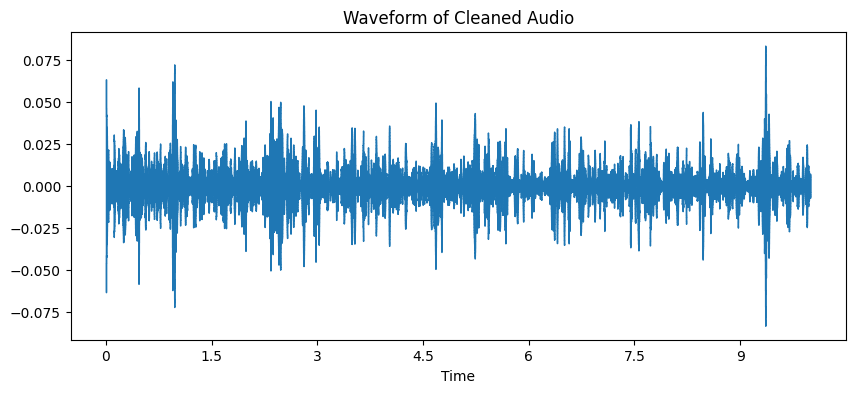

In [ ]:
import librosa
import soundfile as sf
import matplotlib.pyplot as plt

# Load and convert audio to a uniform format and sampling rate
audio_path = '/content/drive/My Drive/HS Cleared Audio/filename.wav'
y, sr = librosa.load(audio_path, sr=16000)  # Convert to 16kHz
sf.write('/content/drive/My Drive/HS Cleared Audio.wav' ,y, sr)

# Assuming y is your audio data that you want to display
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)  # Use 'y' instead of 'y_fixed_length'
plt.title('Waveform of Cleaned Audio')
plt.show()



In [ ]:
# Install required libraries
!pip install librosa

import librosa
import os
import numpy as np

# Set the folder path where your audio files are stored
folder_path ='/content/drive/My Drive/HS Cleared Audio'  # Update this to your folder path

# List to store all audio data and their corresponding sample rates
all_audio_data = []
all_sample_rates = []

# Loop through all audio files in the folder and load them
audio_filenames = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

for audio_file in audio_filenames:
    file_path = os.path.join(folder_path, audio_file)
    y, sr = librosa.load(file_path, sr=None)  # Load the audio file with original sample rate
    all_audio_data.append(y)  # Store audio data
    all_sample_rates.append(sr)  # Store the sample rate

# Example: Convert all audios to a common sample rate (e.g., 16kHz) and concatenate them into a single array
target_sr = 16000
all_preprocessed_audio = []

for i, audio_data in enumerate(all_audio_data):
    # Resample audio to the target sample rate
    y_resampled = librosa.resample(audio_data, orig_sr=all_sample_rates[i], target_sr=target_sr)
    all_preprocessed_audio.append(y_resampled)

# Concatenate all preprocessed audios into one large array
combined_audio = np.concatenate(all_preprocessed_audio)

# combined_audio is the entire batch of audios preprocessed as one dataset
print(f"Combined audio shape: {combined_audio.shape}")


Combined audio shape: (13579294,)


In [ ]:
import librosa
import numpy as np

# Feature extraction function
def extract_features(y, sr):
    # Example features you can extract
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # MFCCs
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr)  # Mel-spectrogram
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)  # Chroma features

    # Aggregate all features into a single feature array (flatten for simplicity)
    features = np.concatenate([mfccs.flatten(), mel_spec.flatten(), chroma.flatten()])
    return features

# Extract features from the combined audio
target_sr = 16000  # Make sure sample rate is consistent
features_combined_audio = extract_features(combined_audio, sr=target_sr)

# Features shape
print(f"Extracted features shape: {features_combined_audio.shape}")

# Optional: Normalizing/Scaling the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_combined_audio.reshape(-1, 1))  # Scaling

# Reshaping back to 1D array after scaling
scaled_features = scaled_features.flatten()

# Saving the processed features to a file for future use
np.save('processed_audio_features.npy', scaled_features)
print("Saved scaled features to processed_audio_features.npy")


/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Extracted features shape: (4058019,)
Saved scaled features to processed_audio_features.npy


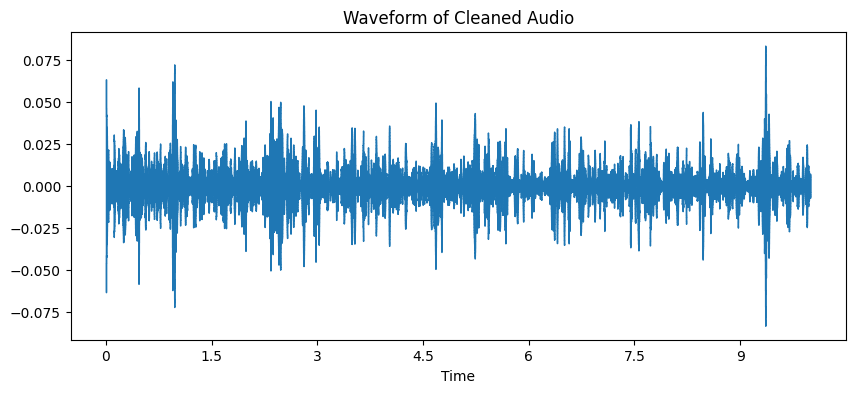

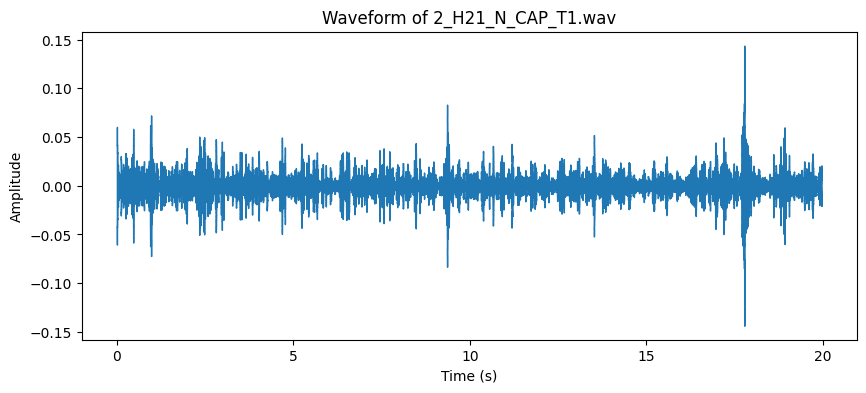

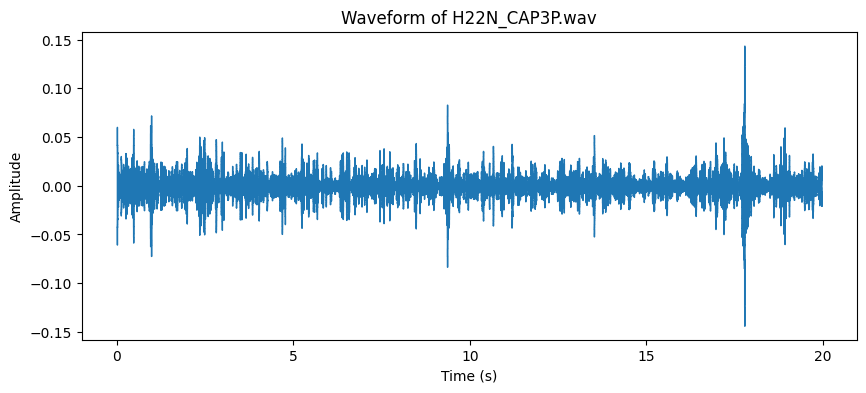

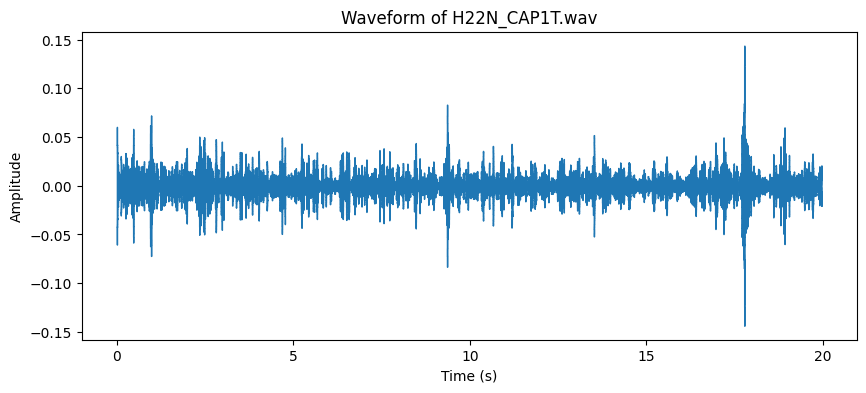

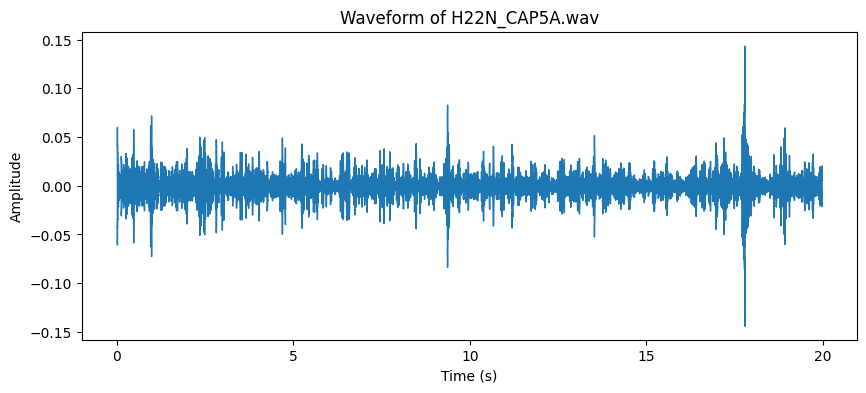

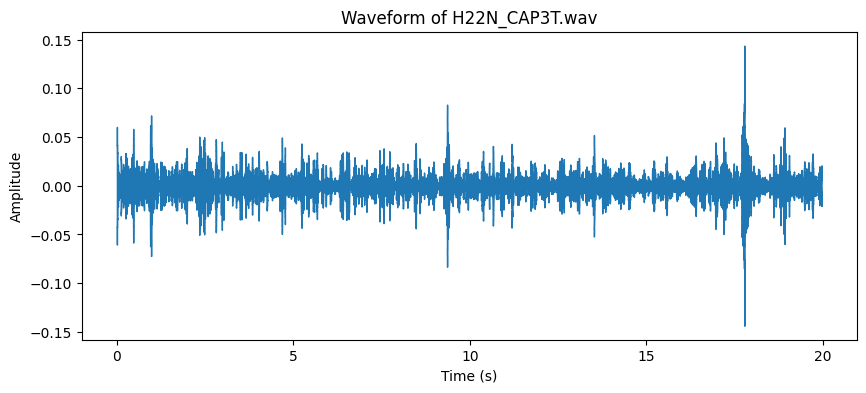

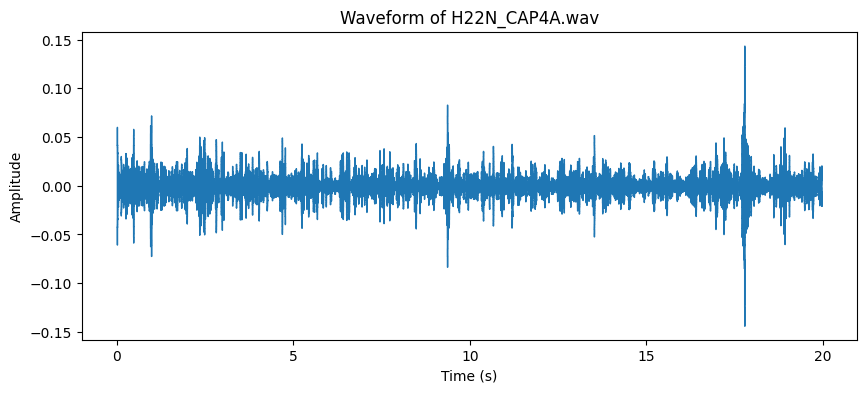

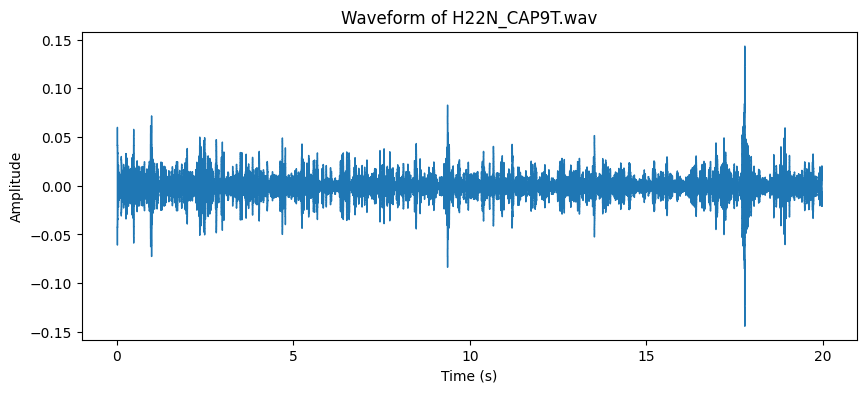

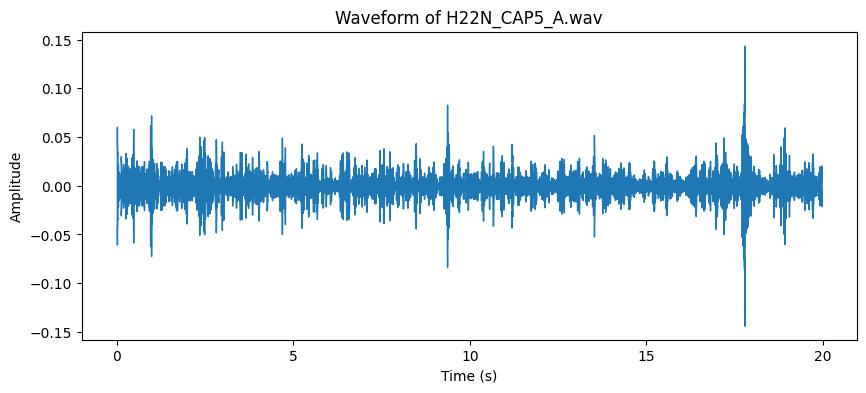

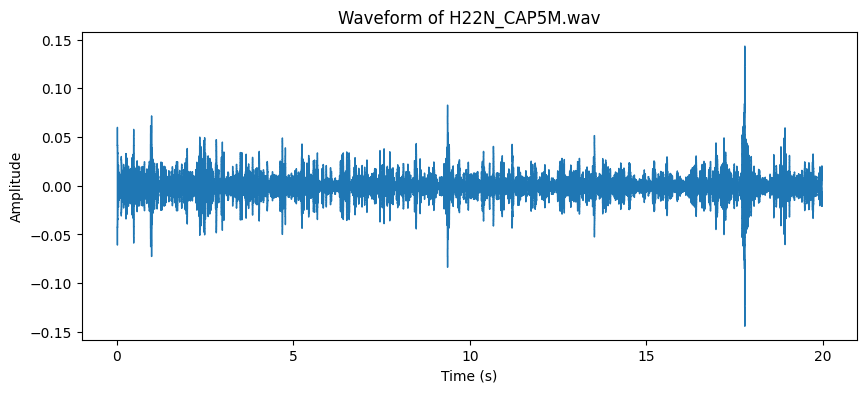

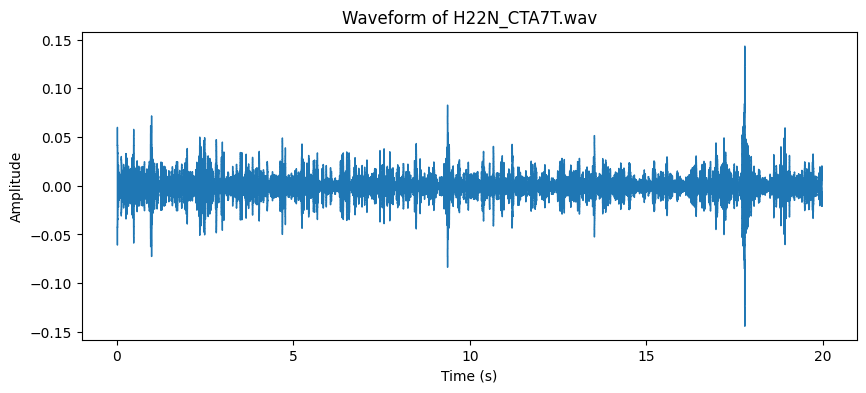

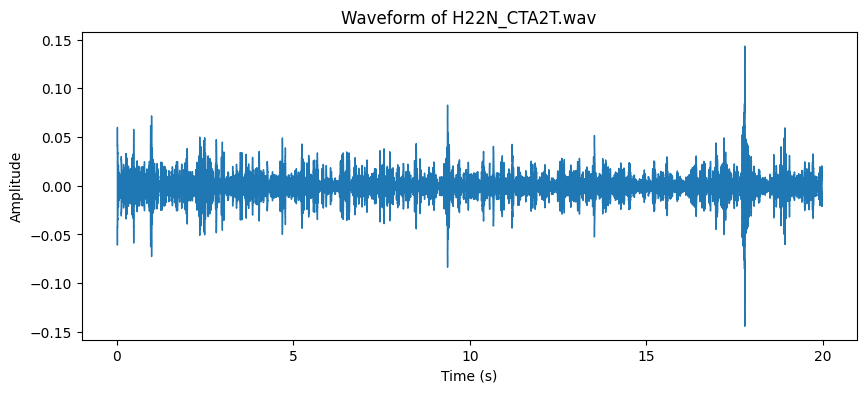

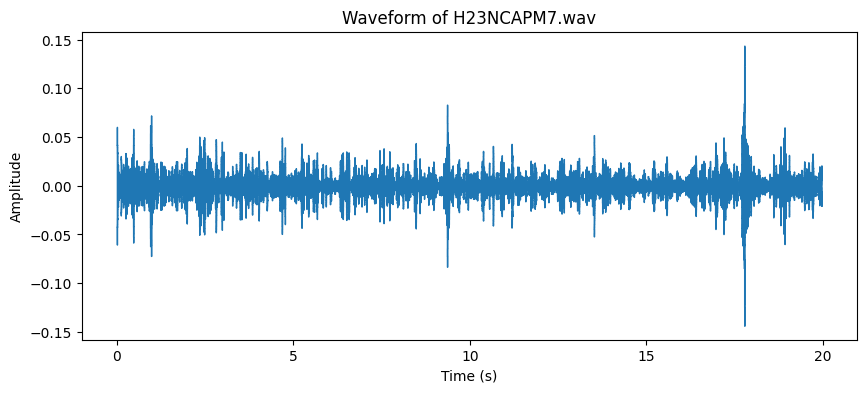

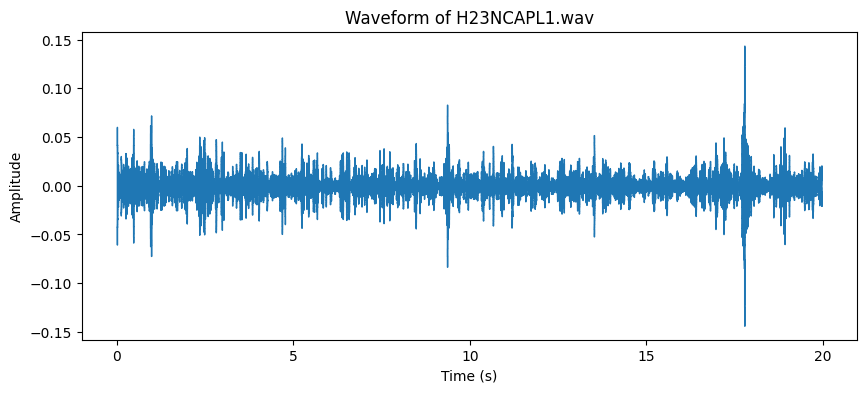

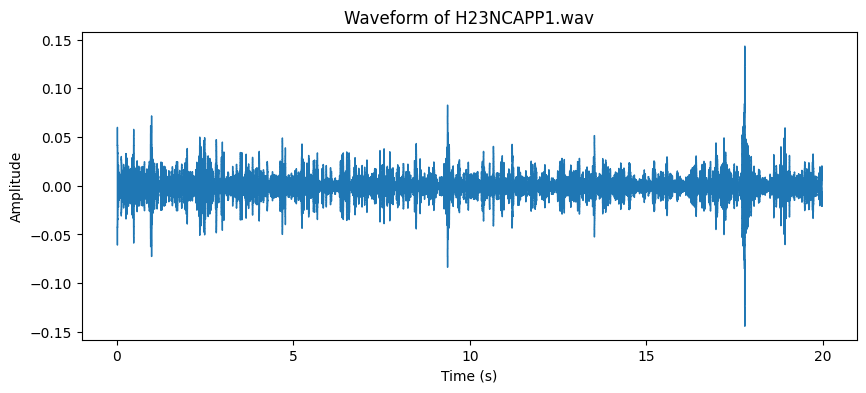

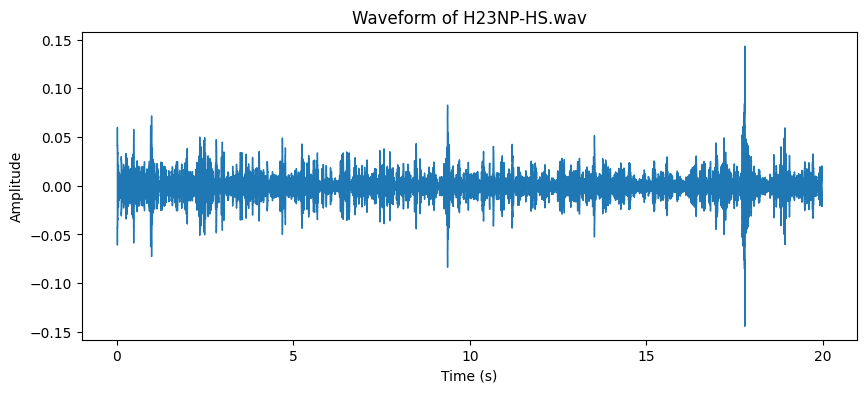

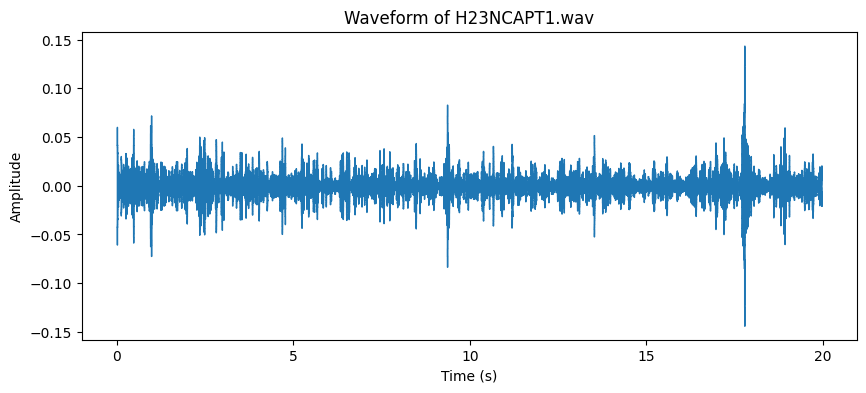

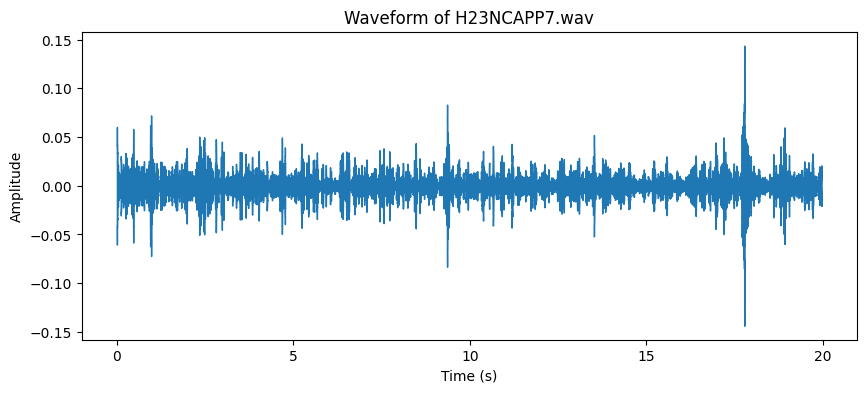

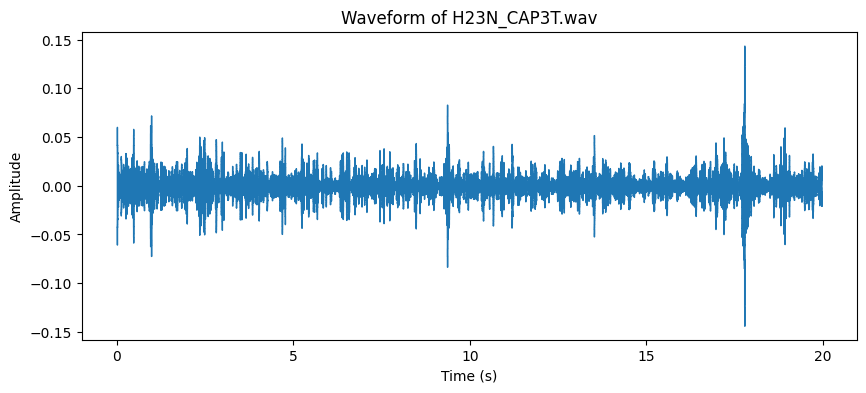

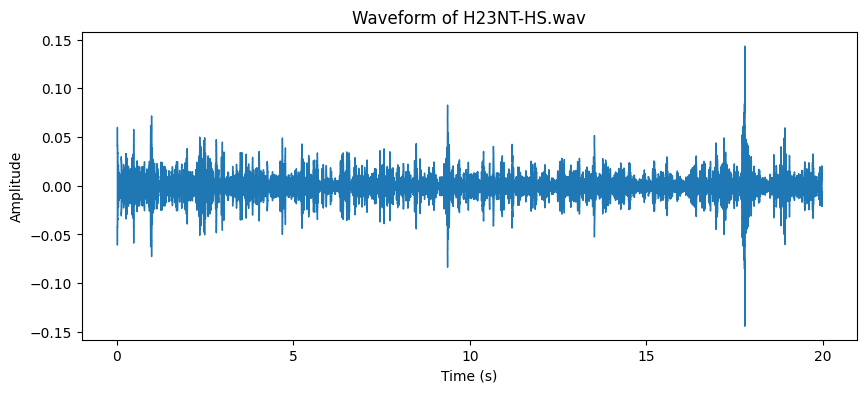

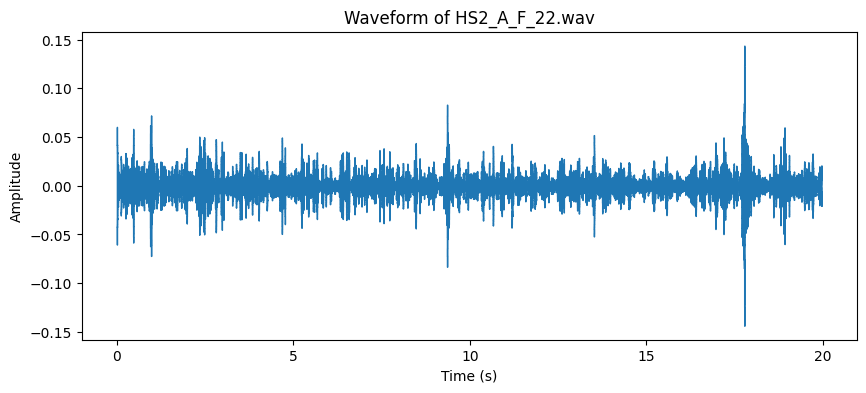

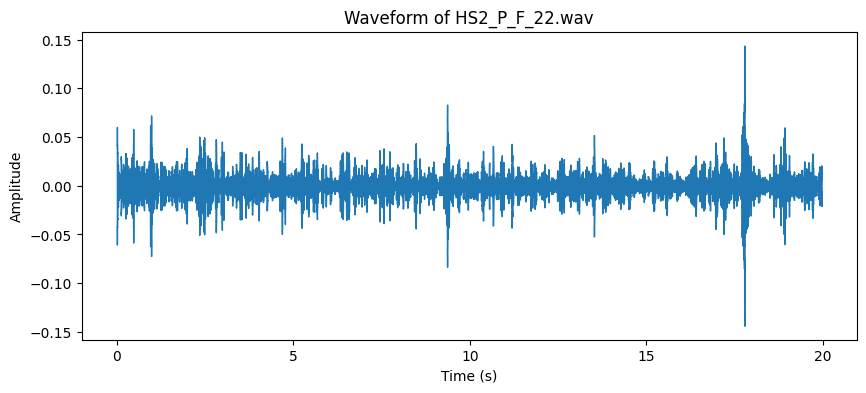

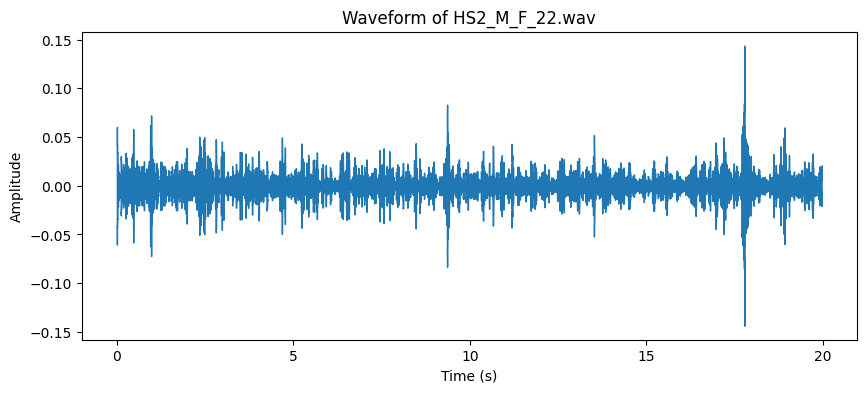

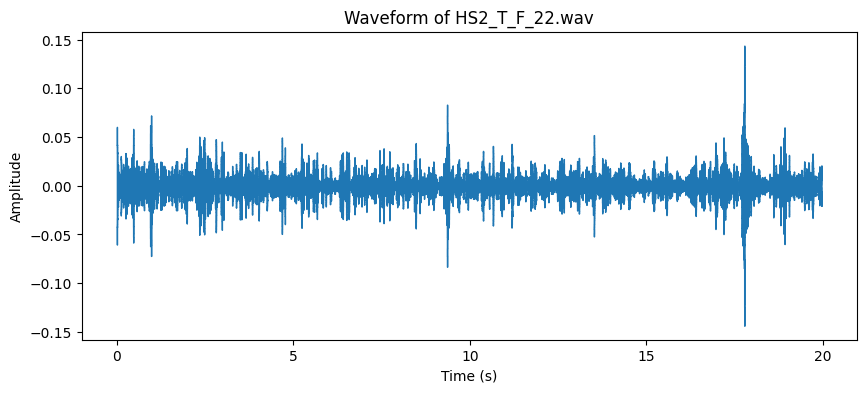

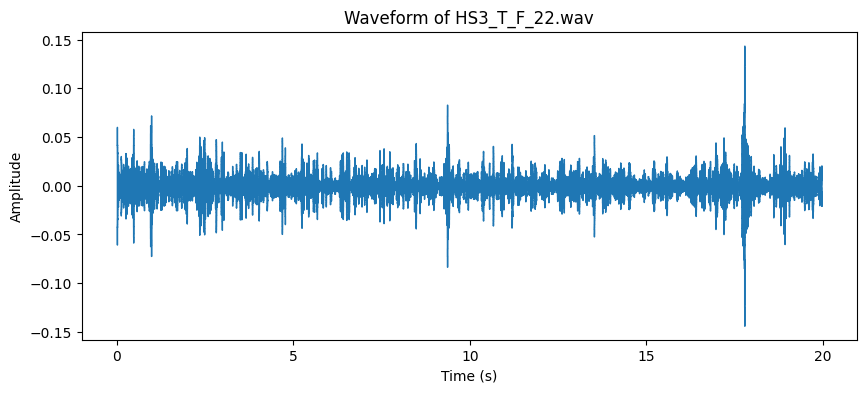

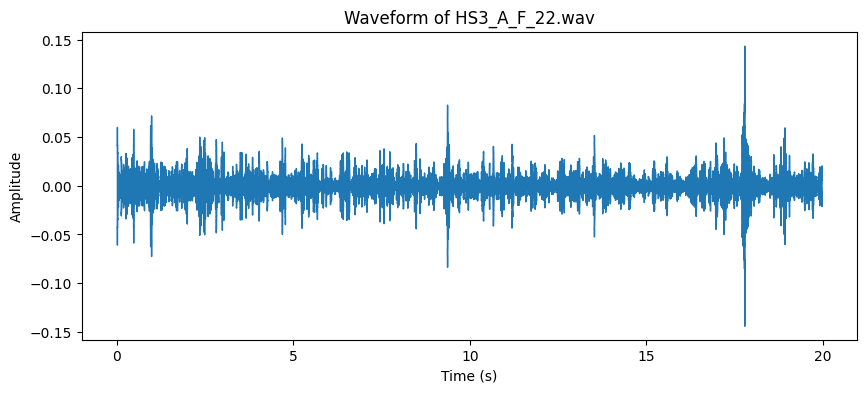

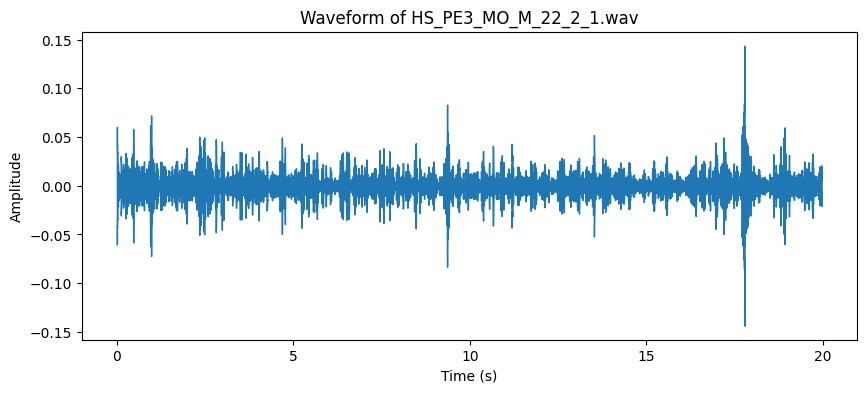

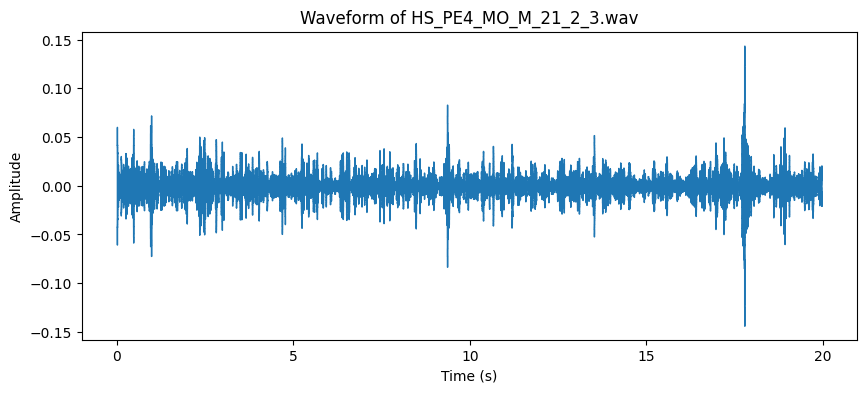

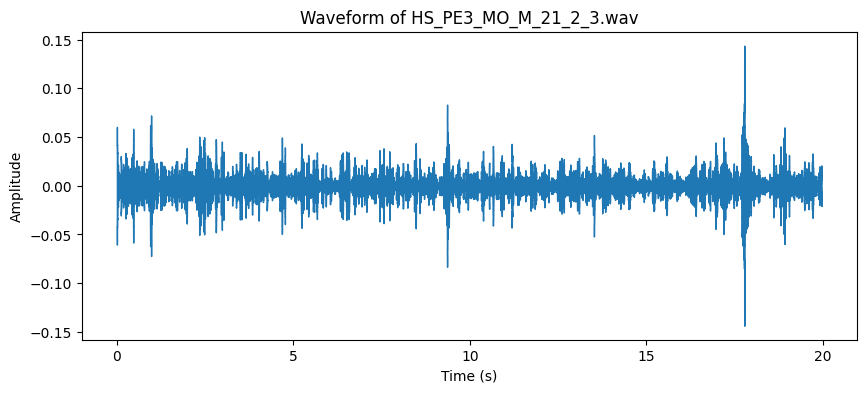

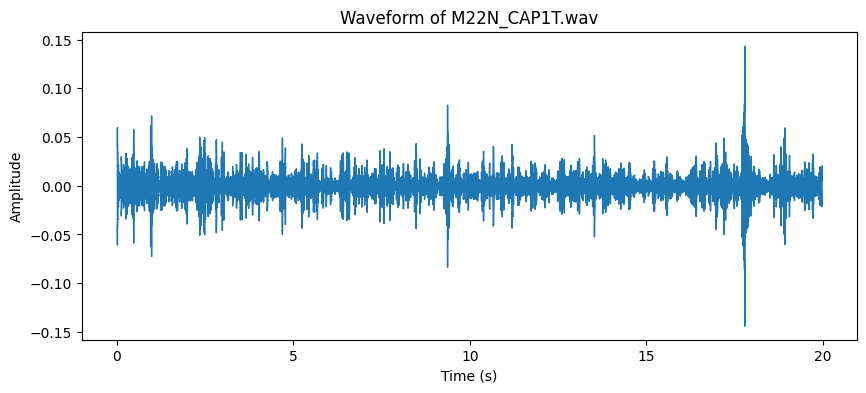

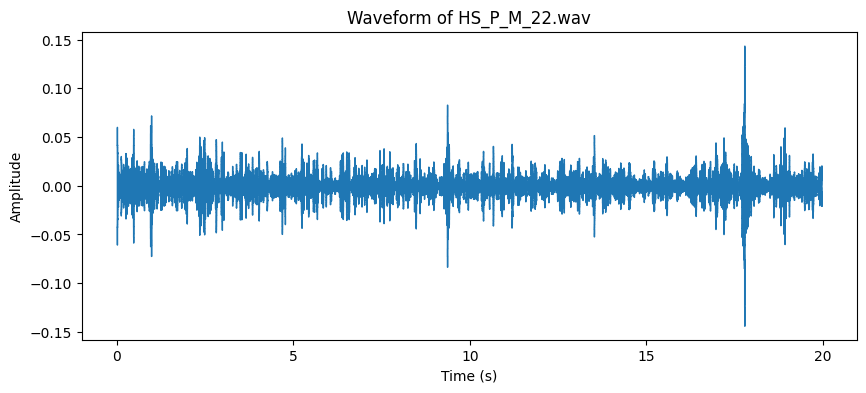

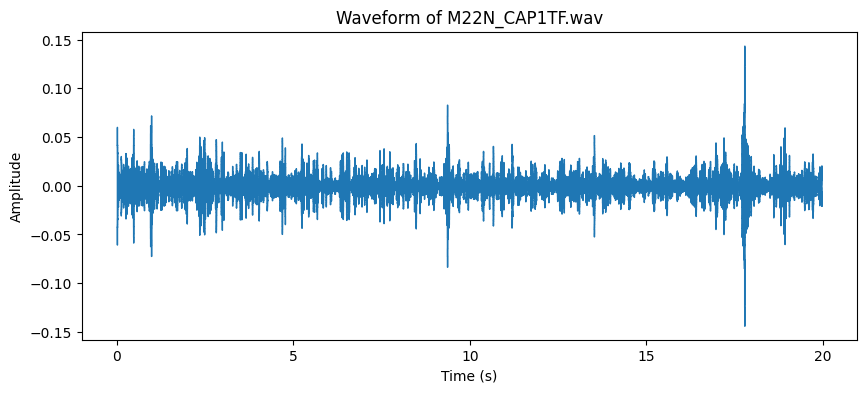

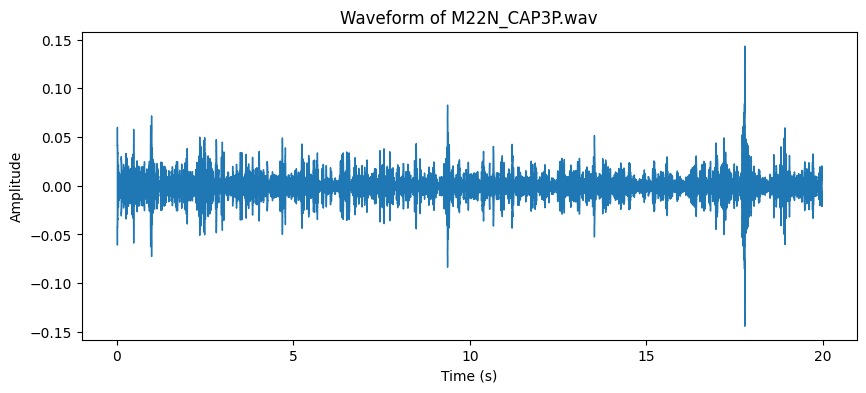

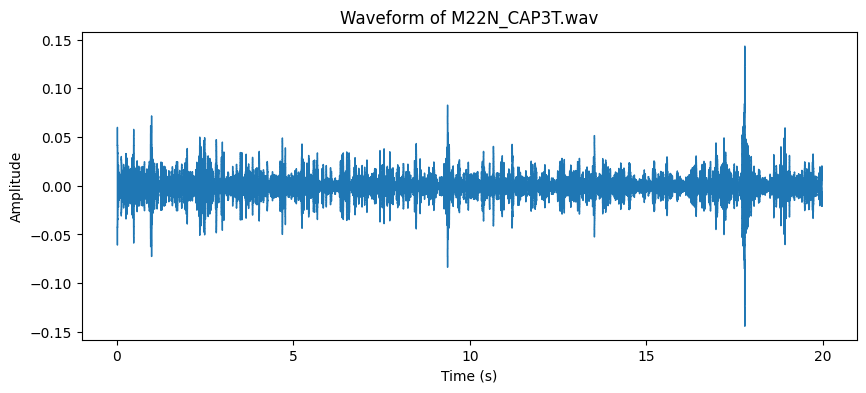

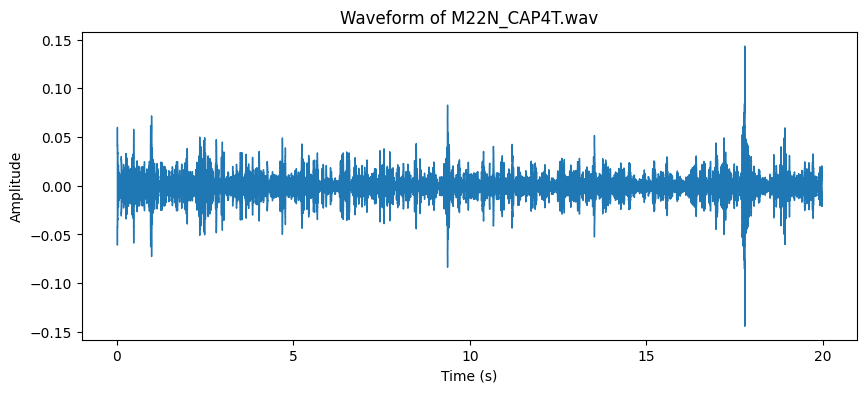

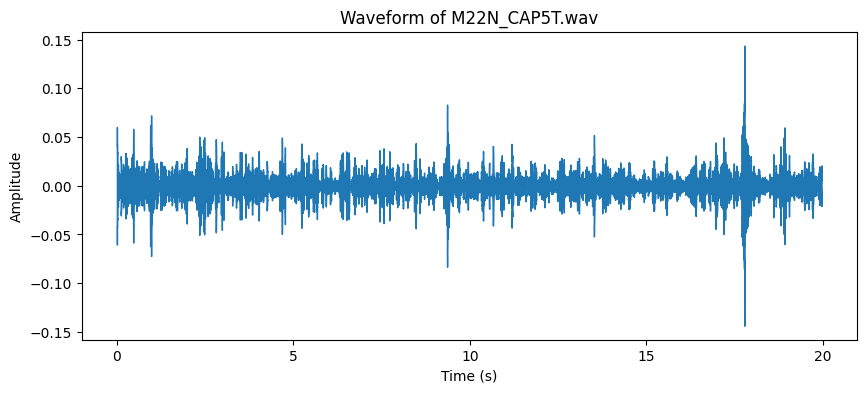

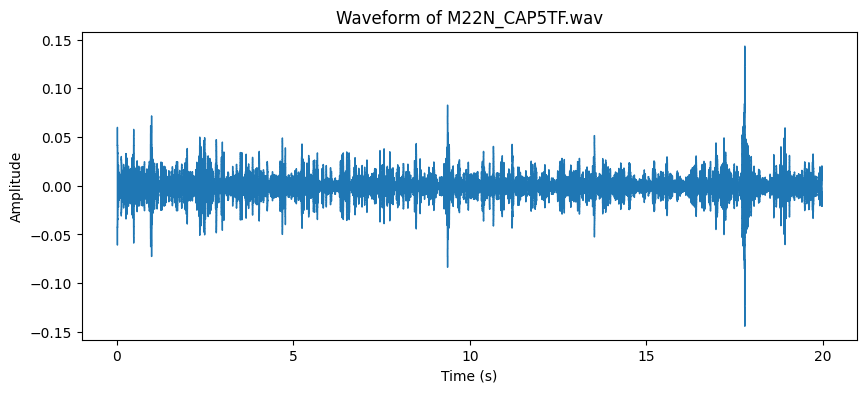

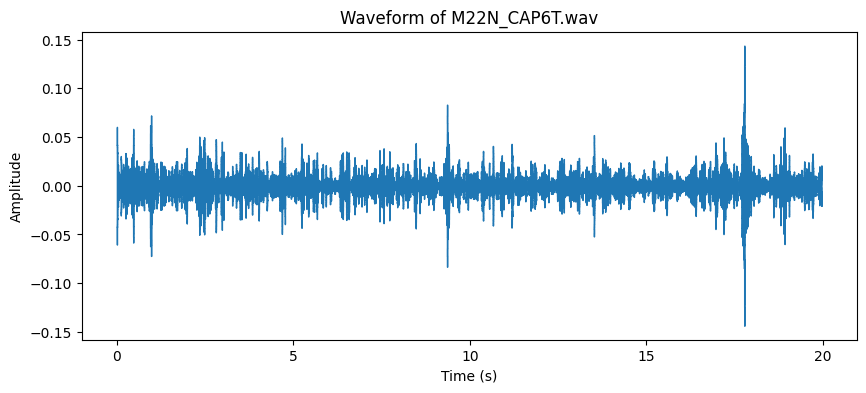

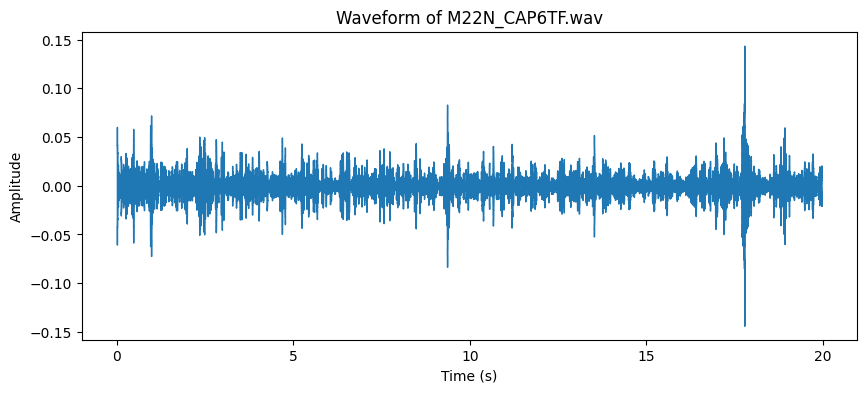

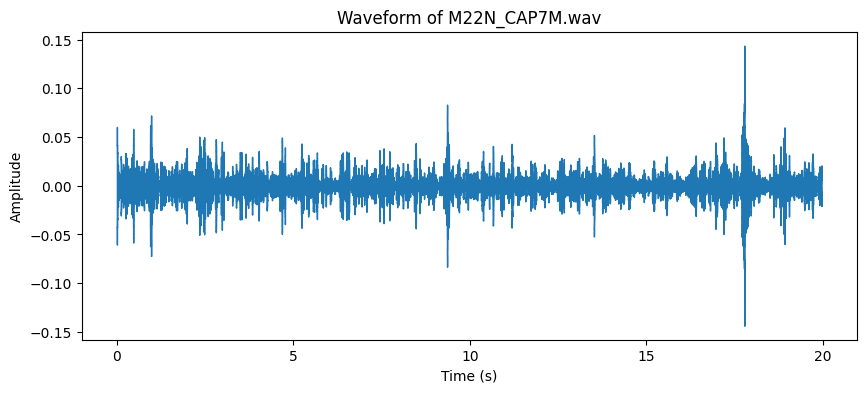

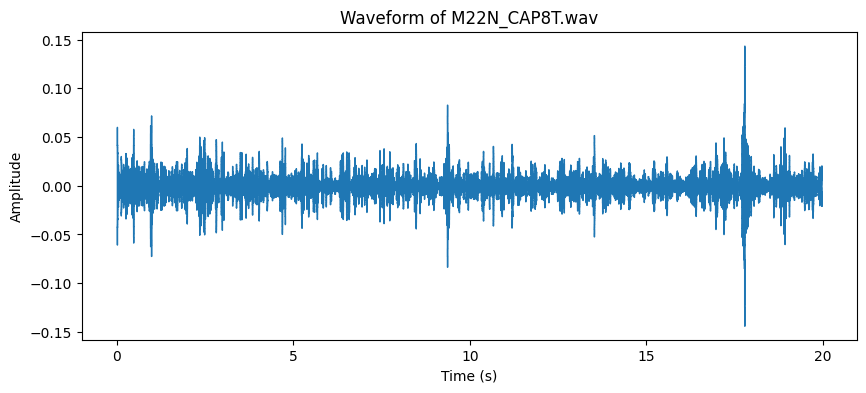

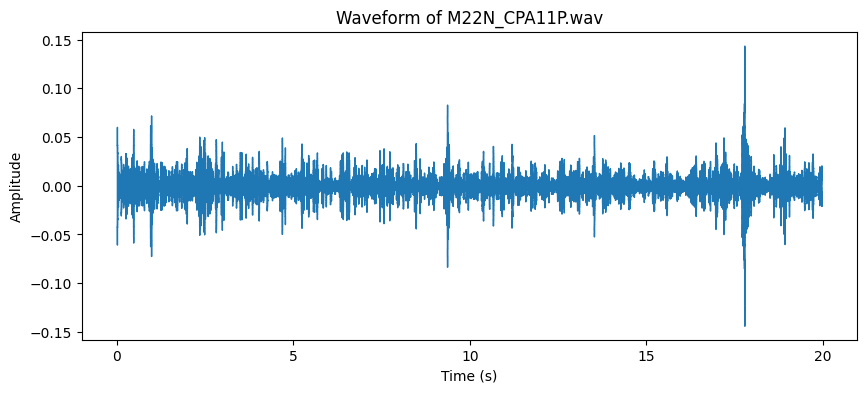

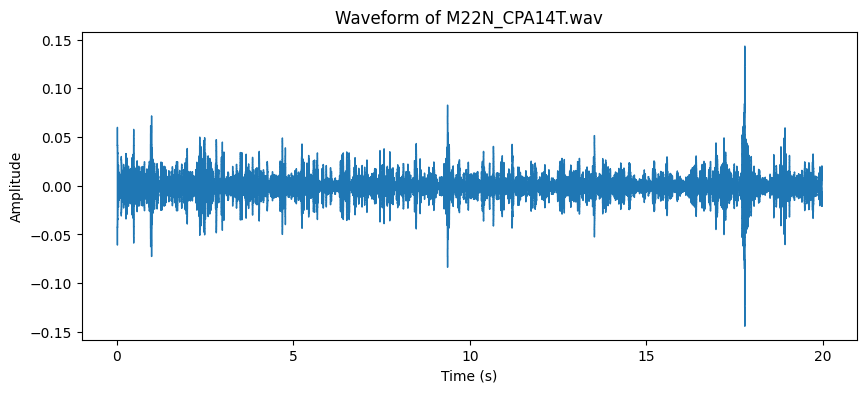

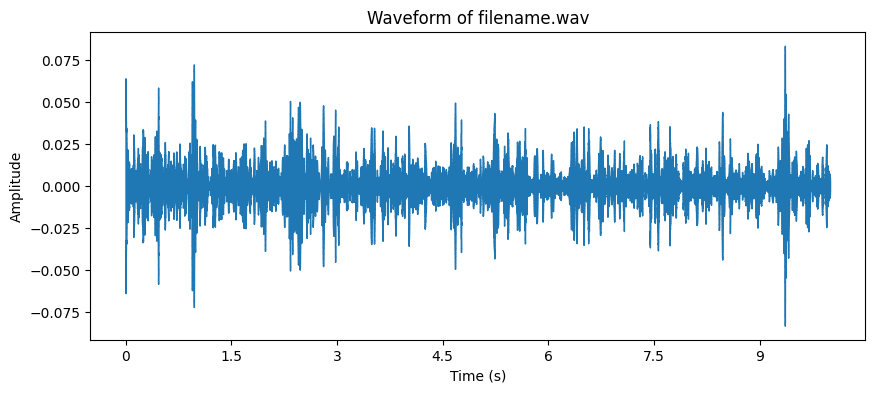

Processed 43 audio files.


In [ ]:
# Install required libraries
!pip install librosa matplotlib

import librosa
import os
import matplotlib.pyplot as plt

# Set the folder path where your audio files are stored
folder_path = '/content/drive/My Drive/HS Cleared Audio'  # Update this to your folder path

# List to store all audio data
all_audio_data = []

# Loop through all audio files in the folder and load them
audio_filenames = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

# Function to plot the waveform of an audio file
def plot_waveform(audio_data, sr, title):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio_data, sr=sr)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

for audio_file in audio_filenames:
    file_path = os.path.join(folder_path, audio_file)
    y, sr = librosa.load(file_path, sr=None)  # Load the audio file with original sample rate
    all_audio_data.append(y)

    # Plot the waveform for the current audio file
    plot_waveform(y, sr, title=f"Waveform of {audio_file}")

print(f"Processed {len(audio_filenames)} audio files.")


In [ ]:
import librosa
import numpy as np
import os

def extract_features(audio_path, sr=16000, n_mfcc=40):
    # Load the audio file and convert it to the desired sample rate
    y, sr = librosa.load(audio_path, sr=sr)

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Transpose MFCCs to get time series format
    return mfccs.T

# Load and extract features from the PCG audio
# Get the list of files in the directory
folder_path = '/content/drive/My Drive/HS Cleared Audio'
audio_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

# Iterate over the audio files and extract features for each file
for audio_file in audio_files:
  audio_path = os.path.join(folder_path, audio_file)
  mfccs = extract_features(audio_path)
  print(f"Extracted MFCC shape for {audio_file}: {mfccs.shape}")


Extracted MFCC shape for 2_H21_N_CAP_T1.wav: (625, 40)
Extracted MFCC shape for H22N_CAP3P.wav: (625, 40)
Extracted MFCC shape for H22N_CAP1T.wav: (625, 40)
Extracted MFCC shape for H22N_CAP5A.wav: (625, 40)
Extracted MFCC shape for H22N_CAP3T.wav: (625, 40)
Extracted MFCC shape for H22N_CAP4A.wav: (625, 40)
Extracted MFCC shape for H22N_CAP9T.wav: (625, 40)
Extracted MFCC shape for H22N_CAP5_A.wav: (625, 40)
Extracted MFCC shape for H22N_CAP5M.wav: (625, 40)
Extracted MFCC shape for H22N_CTA7T.wav: (625, 40)
Extracted MFCC shape for H22N_CTA2T.wav: (625, 40)
Extracted MFCC shape for H23NCAPM7.wav: (625, 40)
Extracted MFCC shape for H23NCAPL1.wav: (625, 40)
Extracted MFCC shape for H23NCAPP1.wav: (625, 40)
Extracted MFCC shape for H23NP-HS.wav: (625, 40)
Extracted MFCC shape for H23NCAPT1.wav: (625, 40)
Extracted MFCC shape for H23NCAPP7.wav: (625, 40)
Extracted MFCC shape for H23N_CAP3T.wav: (625, 40)
Extracted MFCC shape for H23NT-HS.wav: (625, 40)
Extracted MFCC shape for HS2_A_F_22

In [ ]:
import os
import librosa
import numpy as np

def extract_features(audio_path, sr=16000, n_mfcc=40):
    """
    Extract MFCC features from an audio file.
    """
    y, sr = librosa.load(audio_path, sr=sr)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfccs.T  # Return MFCCs with time steps as rows

def preprocess_audio_folder(folder_path, sr=16000, n_mfcc=40):
    """
    Preprocess all audio files in a folder and return the extracted features and file names.
    """
    all_features = []
    file_names = []

    # Iterate through all files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.wav'):  # Ensure you're processing only .wav files
            file_path = os.path.join(folder_path, file_name)
            print(f"Processing {file_name}...")

            # Extract features for each file
            features = extract_features(file_path, sr=sr, n_mfcc=n_mfcc)

            # Append features and file names to lists
            all_features.append(features)
            file_names.append(file_name)

    # Return all features and file names as lists
    return all_features, file_names

# Specify folder path containing audio files
folder_path = '/content/drive/My Drive/HS Cleared Audio'

# Preprocess all audio files in the folder at once
all_features, file_names = preprocess_audio_folder(folder_path)

# Convert list of features to numpy array
# Note: Features from different files may have different lengths
# Therefore, use dtype=object if you want to keep different lengths intact
all_features_np = np.array(all_features, dtype=object)

# Print shapes of features from all files
for idx, features in enumerate(all_features_np):
    print(f"File: {file_names[idx]}, MFCC shape: {features.shape}")

# Optionally, save features and file names for later use
np.save('/path/to/save/features.npy', all_features_np)
np.save('/path/to/save/file_names.npy', np.array(file_names))


Processing 2_H21_N_CAP_T1.wav...
Processing H22N_CAP3P.wav...
Processing H22N_CAP1T.wav...
Processing H22N_CAP5A.wav...
Processing H22N_CAP3T.wav...
Processing H22N_CAP4A.wav...
Processing H22N_CAP9T.wav...
Processing H22N_CAP5_A.wav...
Processing H22N_CAP5M.wav...
Processing H22N_CTA7T.wav...
Processing H22N_CTA2T.wav...
Processing H23NCAPM7.wav...
Processing H23NCAPL1.wav...
Processing H23NCAPP1.wav...
Processing H23NP-HS.wav...
Processing H23NCAPT1.wav...
Processing H23NCAPP7.wav...
Processing H23N_CAP3T.wav...
Processing H23NT-HS.wav...
Processing HS2_A_F_22.wav...
Processing HS2_P_F_22.wav...
Processing HS2_M_F_22.wav...
Processing HS2_T_F_22.wav...
Processing HS3_T_F_22.wav...
Processing HS3_A_F_22.wav...
Processing HS_PE3_MO_M_22_2_1.wav...
Processing HS_PE4_MO_M_21_2_3.wav...
Processing HS_PE3_MO_M_21_2_3.wav...
Processing M22N_CAP1T.wav...
Processing HS_P_M_22.wav...
Processing M22N_CAP1TF.wav...
Processing M22N_CAP3P.wav...
Processing M22N_CAP3T.wav...
Processing M22N_CAP4T.w

FileNotFoundError: [Errno 2] No such file or directory: '/path/to/save/features.npy'

In [ ]:
!ls /content/drive/My\ Drive/HS\ Cleared\ Audio # Removed the incorrect 'shell' keyword before the shell command.

ls: cannot access '/content/drive/My Drive/HS Cleared Audio': No such file or directory


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Define the XLSTM model
def create_xlstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape, return_sequences=True))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))  # Adjust according to your output
    model.compile(optimizer='adam', loss='mean_squared_error')  # Adjust loss function as needed
    return model

# Define input shape
input_shape = (X_train.shape[1], X_train.shape[2])

# Create and train the model
model = create_xlstm_model(input_shape)
history = model.fit(X_train, y_train, epochs=50, batch_size=1, validation_split=0.2, verbose=1)



In [ ]:
import os
import librosa
import numpy as np

def extract_features(audio_path, sr=16000, n_mfcc=40):
    """
    Function to extract MFCC features from an audio file.
    """
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=sr)

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    return mfccs.T  # Return MFCCs with time steps as rows

def preprocess_audio_folder(folder_path, output_file, sr=16000, n_mfcc=40):
    """
    Function to preprocess all audio files in a folder and save the extracted features.
    """
    all_features = []
    file_names = []

    # Iterate through each file in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.wav'):  # Ensure you're processing only .wav files
            file_path = os.path.join(folder_path, file_name)
            print(f"Processing {file_name}...")

            # Extract features
            features = extract_features(file_path, sr=sr, n_mfcc=n_mfcc)

            # Append to the list of features and store the file name
            all_features.append(features)
            file_names.append(file_name)

    # Convert list of features to numpy array
    all_features_np = np.array(all_features, dtype=object)  # Use dtype=object to handle different lengths of MFCCs

    # Create the directory if it doesn't exist
    output_dir = os.path.dirname(output_file) # Extract directory from output_file
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Save the extracted features to a file
    np.save(output_file, all_features_np)
    np.save(f"{output_file}_filenames.npy", np.array(file_names))

    print(f"Preprocessing complete. Features saved to {output_file}.npy")

# Specify the folder containing the audio files and output file for features
folder_path = '/content/drive/My Drive/HS Cleared Audio'
output_file = '/content/drive/My Drive/preprocessed_features' # Changed to a valid directory

# Preprocess all audio files in the folder
preprocess_audio_folder(folder_path, output_file)


Processing 2_H21_N_CAP_T1.wav...
Processing H22N_CAP3P.wav...
Processing H22N_CAP1T.wav...
Processing H22N_CAP5A.wav...
Processing H22N_CAP3T.wav...
Processing H22N_CAP4A.wav...
Processing H22N_CAP9T.wav...
Processing H22N_CAP5_A.wav...
Processing H22N_CAP5M.wav...
Processing H22N_CTA7T.wav...
Processing H22N_CTA2T.wav...
Processing H23NCAPM7.wav...
Processing H23NCAPL1.wav...
Processing H23NCAPP1.wav...
Processing H23NP-HS.wav...
Processing H23NCAPT1.wav...
Processing H23NCAPP7.wav...
Processing H23N_CAP3T.wav...
Processing H23NT-HS.wav...
Processing HS2_A_F_22.wav...
Processing HS2_P_F_22.wav...
Processing HS2_M_F_22.wav...
Processing HS2_T_F_22.wav...
Processing HS3_T_F_22.wav...
Processing HS3_A_F_22.wav...
Processing HS_PE3_MO_M_22_2_1.wav...
Processing HS_PE4_MO_M_21_2_3.wav...
Processing HS_PE3_MO_M_21_2_3.wav...
Processing M22N_CAP1T.wav...
Processing HS_P_M_22.wav...
Processing M22N_CAP1TF.wav...
Processing M22N_CAP3P.wav...
Processing M22N_CAP3T.wav...
Processing M22N_CAP4T.w

In [ ]:
import os
import librosa
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Path to the folder containing the audio files on Google Drive
folder_path = '/content/drive/My Drive/HS Cleared Audio/'

def extract_features(audio_path, sr=16000, n_mfcc=40):
    """
    Extract MFCC features from an audio file.
    """
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=sr)

    # Extract MFCC features
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)

    # Transpose MFCCs to get time series format
    return mfccs.T

def preprocess_audio_folder(folder_path, sr=16000, n_mfcc=40):
    """
    Preprocess all audio files in a folder and return the extracted features and file names.
    """
    all_features = []
    file_names = []

    # Iterate through each file in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.wav'):  # Process only .wav files
            file_path = os.path.join(folder_path, file_name)
            print(f"Processing {file_name}...")

            # Extract features
            features = extract_features(file_path, sr=sr, n_mfcc=n_mfcc)

            # Append to the list of features and store the file name
            all_features.append(features)
            file_names.append(file_name)

    return all_features, file_names

# Preprocess all audio files in the folder
all_features, file_names = preprocess_audio_folder(folder_path)

# Optionally save the features to a numpy file
np.save('/content/drive/My Drive/processed_features.npy', np.array(all_features, dtype=object))
np.save('/content/drive/My Drive/file_names.npy', np.array(file_names))



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Processing 2_H21_N_CAP_T1.wav...
Processing H22N_CAP3P.wav...
Processing H22N_CAP1T.wav...
Processing H22N_CAP5A.wav...
Processing H22N_CAP3T.wav...
Processing H22N_CAP4A.wav...
Processing H22N_CAP9T.wav...
Processing H22N_CAP5_A.wav...
Processing H22N_CAP5M.wav...
Processing H22N_CTA7T.wav...
Processing H22N_CTA2T.wav...
Processing H23NCAPM7.wav...
Processing H23NCAPL1.wav...
Processing H23NCAPP1.wav...
Processing H23NP-HS.wav...
Processing H23NCAPT1.wav...
Processing H23NCAPP7.wav...
Processing H23N_CAP3T.wav...
Processing H23NT-HS.wav...
Processing HS2_A_F_22.wav...
Processing HS2_P_F_22.wav...
Processing HS2_M_F_22.wav...
Processing HS2_T_F_22.wav...
Processing HS3_T_F_22.wav...
Processing HS3_A_F_22.wav...
Processing HS_PE3_MO_M_22_2_1.wav...
Processing HS_PE4_MO_M_21_2_3.wav...
Processing HS_PE3_MO_M_21_2_3.wav...
Processing M22N_CAP1T.wav...
Processing

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

# Step 1: Load preprocessed features and labels
# Ensure these .npy files were saved earlier from the preprocessing step
X = np.load('/content/drive/My Drive/processed_features.npy', allow_pickle=True)
file_names = np.load('/content/drive/My Drive/file_names.npy')

# Assuming y_labels contains your labels for the heart sounds (e.g., normal/abnormal)
# For demonstration, generating random binary labels. Replace with actual labels.
y_labels = np.random.randint(2, size=len(file_names))  # Replace with actual labels

# Step 2: Prepare the data for training
# Pad sequences to ensure uniform input shape, as audio files may have different lengths
from tensorflow.keras.preprocessing.sequence import pad_sequences
X_padded = pad_sequences(X, dtype='float32', padding='post', maxlen=1000)  # Adjust maxlen accordingly

# Convert labels to categorical (for binary classification, use 0 or 1)
y = to_categorical(y_labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Step 3: Build the XLSTM Model
def build_xlstm_model(input_shape):
    model = Sequential()

    # First LSTM layer with BatchNormalization
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(BatchNormalization())

    # Second LSTM layer
    model.add(LSTM(128, return_sequences=True))
    model.add(BatchNormalization())

    # Dropout layer to prevent overfitting
    model.add(Dropout(0.3))

    # Third LSTM layer
    model.add(LSTM(128))
    model.add(BatchNormalization())

    # Fully connected layer
    model.add(Dense(64, activation='relu'))

    # Output layer for binary classification (normal/abnormal heart sound)
    model.add(Dense(2, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Step 4: Train the model
input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)
model = build_xlstm_model(input_shape)

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Save the trained model for future use
model.save('/content/drive/My Drive/xlstm_heart_sound_model.h5')


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 1000, 128)           │          86,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 1000, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 1000, 128)           │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 1000, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1000, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 359,618 (1.37 MB)

 Trainable params: 358,850 (1.37 MB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.4444 - loss: 0.9872 - val_accuracy: 0.8571 - val_loss: 0.6885
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4074 - loss: 1.2422 - val_accuracy: 0.8571 - val_loss: 0.6847
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5185 - loss: 1.0656 - val_accuracy: 0.8571 - val_loss: 0.6808
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.4444 - loss: 1.0118 - val_accuracy: 0.8571 - val_loss: 0.6770
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.4815 - loss: 0.8456 - val_accuracy: 0.8571 - val_loss: 0.6737
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.6667 - loss: 0.6589 - val_accuracy: 0.8571 - val_loss: 0.6710
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.4444 - loss: 0.8860 - val_accuracy: 0.8571 - val_loss: 0.6676
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.5185 - loss: 0.8550 - val_accuracy: 0.8571 - val_loss: 0.6630
Epoch 9/20
1

Test Accuracy: 66.67%


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Step 1: Load preprocessed features and labels
# Assuming you saved the features and labels in numpy format earlier
X = np.load('/content/drive/My Drive/processed_features.npy', allow_pickle=True)
file_names = np.load('/content/drive/My Drive/file_names.npy')

# Assuming y_labels contains your actual labels for the heart sounds (normal/abnormal)
# For this example, generating random binary labels. Replace with your actual labels
y_labels = np.random.randint(2, size=len(file_names))  # Replace this with your actual labels

# Step 2: Pad sequences to ensure uniform input shape
# Audio files might have different lengths, so padding is required
X_padded = pad_sequences(X, dtype='float32', padding='post', maxlen=1000)  # Adjust maxlen as per your data

# Convert labels to categorical (for binary classification)
y = to_categorical(y_labels)

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Step 4: Build the Stacked LSTM Model
def build_stacked_lstm_model(input_shape):
    model = Sequential()

    # First LSTM layer
    model.add(LSTM(128, return_sequences=True, input_shape=input_shape))
    model.add(BatchNormalization())

    # Second LSTM layer
    model.add(LSTM(128, return_sequences=True))
    model.add(BatchNormalization())

    # Third LSTM layer
    model.add(LSTM(128))
    model.add(BatchNormalization())

    # Fully connected layer
    model.add(Dense(64, activation='relu'))

    # Dropout to prevent overfitting
    model.add(Dropout(0.3))

    # Output layer for binary classification
    model.add(Dense(2, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Step 5: Create and train the model
input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)
model = build_stacked_lstm_model(input_shape)

# Print model summary to check its architecture
model.summary()

# Step 6: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Step 7: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 8: Save the trained model
model.save('/content/drive/My Drive/staked_lstm_heart_sound_model.h5')


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 1000, 128)           │          86,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 1000, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 1000, 128)           │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 1000, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_8 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 359,618 (1.37 MB)

 Trainable params: 358,850 (1.37 MB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.4815 - loss: 0.6931 - val_accuracy: 0.7143 - val_loss: 0.6919
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.4444 - loss: 0.6934 - val_accuracy: 0.7143 - val_loss: 0.6922
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4815 - loss: 0.6931 - val_accuracy: 0.7143 - val_loss: 0.6924
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.5926 - loss: 0.6932 - val_accuracy: 0.2857 - val_loss: 0.6933
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.4815 - loss: 0.6928 - val_accuracy: 0.2857 - val_loss: 0.6936
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.5185 - loss: 0.6934 - val_accuracy: 0.2857 - val_loss: 0.6940
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5185 - loss: 0.6925 - val_accuracy: 0.2857 - val_loss: 0.6944
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5185 - loss: 0.6935 - val_accuracy: 0.2857 - val_loss: 0.6949
Epoch 9/20
1

Test Accuracy: 66.67%


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Step 1: Load preprocessed features and labels
# Ensure these .npy files are your processed features and corresponding labels
X = np.load('/content/drive/My Drive/processed_features.npy', allow_pickle=True)
file_names = np.load('/content/drive/My Drive/file_names.npy')

# Replace this with your actual labels (e.g., 0 for normal, 1 for abnormal heart sounds)
y_labels = np.random.randint(2, size=len(file_names))  # Replace with actual labels

# Step 2: Pad sequences to ensure uniform input shape
X_padded = pad_sequences(X, dtype='float32', padding='post', maxlen=1000)  # Adjust maxlen as per your data

# Convert labels to categorical for binary classification
y = to_categorical(y_labels)

# Step 3: Reshape the data for ConvLSTM input
# ConvLSTM expects 5D input: (batch_size, time_steps, rows, cols, channels)
# We need to reshape X_padded to match this format
X_padded = np.expand_dims(X_padded, axis=-1)  # Add a channel dimension (1 channel for audio)

# We also need to reshape it to add time steps and "spatial" dimensions for ConvLSTM
# (batch_size, time_steps, rows, cols, channels)
# Assuming 1 row and "cols" being the feature dimension (MFCC features)
X_padded = X_padded.reshape((X_padded.shape[0], 1, X_padded.shape[1], X_padded.shape[2], 1))

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

# Step 5: Build the ConvLSTM Model
def build_convlstm_model(input_shape):
    model = Sequential()

    # ConvLSTM2D layer (used for spatiotemporal data)
    model.add(ConvLSTM2D(filters=64, kernel_size=(3, 3), padding='same', return_sequences=True, input_shape=input_shape))
    model.add(BatchNormalization())

    # Another ConvLSTM2D layer
    model.add(ConvLSTM2D(filters=64, kernel_size=(3, 3), padding='same', return_sequences=False))
    model.add(BatchNormalization())

    # Flatten the output to feed into Dense layers
    model.add(Flatten())

    # Fully connected layer
    model.add(Dense(64, activation='relu'))

    # Dropout layer to prevent overfitting
    model.add(Dropout(0.3))

    # Output layer for binary classification
    model.add(Dense(2, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Step 6: Create and train the model
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3], X_train.shape[4])  # (time_steps, rows, cols, channels)
model = build_convlstm_model(input_shape)

# Print the model summary to check its architecture
model.summary()

# Step 7: Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Step 8: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Step 9: Save the trained model
model.save('/content/drive/My Drive/convlstm_heart_sound_model.h5')


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_lstm2d (ConvLSTM2D)             │ (None, 1, 1000, 40, 64)     │         150,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 1, 1000, 40, 64)     │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_lstm2d_1 (ConvLSTM2D)           │ (None, 1000, 40, 64)        │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 1000, 40, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2560000)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │     163,840,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 164,285,890 (626.70 MB)

 Trainable params: 164,285,634 (626.70 MB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 129s 129s/step - accuracy: 0.3704 - loss: 1.9688 - val_accuracy: 0.4286 - val_loss: 42.1806
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 116s 116s/step - accuracy: 0.6296 - loss: 1549.0649 - val_accuracy: 0.4286 - val_loss: 11.5953
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 144s 144s/step - accuracy: 0.5556 - loss: 342.5569 - val_accuracy: 0.5714 - val_loss: 12.1686
Epoch 4/20


KeyboardInterrupt: 

In [ ]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Step 1: Preprocess Audio Files
def extract_features(audio_path, sr=16000, n_mfcc=40):
    try:
        y, sr = librosa.load(audio_path, sr=sr)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        return mfccs.T  # Transpose to match (timesteps, features)
    except Exception as e:
        print(f"Error loading {audio_path}: {str(e)}")
        return None

# Step 2: Load Audio Files from Folder and Extract Features
def load_all_audio_features(folder_path):
    X = []
    y_labels = []

    # Loop through each file in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.wav'):
            audio_path = os.path.join(folder_path, file_name)

            # Extract MFCC features
            mfccs = extract_features(audio_path)

            if mfccs is not None:
                X.append(mfccs)

                # Extract label from the file name or other logic
                if 'normal' in file_name.lower():  # Check for 'normal' in lowercase
                    y_labels.append(0)
                elif 'abnormal' in file_name.lower():  # Check for 'abnormal' in lowercase
                    y_labels.append(1)
                else:
                    print(f"Warning: Unable to determine label for {file_name}. Skipping.")
            else:
                print(f"Warning: Skipping {file_name} due to loading error.")

    return X, y_labels

# Folder containing your audio files
folder_path = '/content/drive/My Drive/HS Cleared Audio/'

# Step 3: Preprocess Data
X, y_labels = load_all_audio_features(folder_path)

# Check if any labels were found
if len(y_labels) == 0:
    print("Error: No labels found in the audio files. Please check file names or labeling logic.")
else:
    # Step 4: Pad the sequences to ensure uniform input shape
    X_padded = pad_sequences(X, dtype='float32', padding='post', maxlen=1000)  # Adjust maxlen as needed
    X_padded = np.expand_dims(X_padded, axis=-1)  # Add a channel dimension

    # Reshape to match ConvLSTM input (batch_size, time_steps, rows, cols, channels)
    X_padded = X_padded.reshape((X_padded.shape[0], 1, X_padded.shape[1], X_padded.shape[2], 1))

    # Convert labels to categorical for binary classification
    y = to_categorical(y_labels)

    # Step 5: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

    # Step 6: Build the ConvLSTM Model
    def build_convlstm_model(input_shape):
        model = Sequential()

        # ConvLSTM2D layer
        model.add(ConvLSTM2D(filters=64, kernel_size=(3, 3), padding='same', return_sequences=True, input_shape=input_shape))
        model.add(BatchNormalization())

        # Another ConvLSTM2D layer
        model.add(ConvLSTM2D(filters=64, kernel_size=(3, 3), padding='same', return_sequences=False))
        model.add(BatchNormalization())

        # Flatten the output to feed into Dense layers
        model.add(Flatten())

        # Fully connected layer
        model.add(Dense(64, activation='relu'))

        # Dropout layer to prevent overfitting
        model.add(Dropout(0.3))

        # Output layer for binary classification
        model.add(Dense(2, activation='softmax'))

        # Compile the model
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        return model

    # Step 7: Create and train the model
    input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3], X_train.shape[4])  # (time_steps, rows, cols, channels)
    model = build_convlstm_model(input_shape)

    # Print model summary
    model.summary()

    # Step 8: Train the model
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

    # Step 9: Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

    # Step 10: Save the model
    model.save('/content/drive/My Drive/convlstm_heart_sound_model.h5')


Error: No labels found in the audio files. Please check file names or labeling logic.


In [ ]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Step 1: Preprocess Audio Files
def extract_features(audio_path, sr=16000, n_mfcc=40):
    try:
        y, sr = librosa.load(audio_path, sr=sr)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
        return mfccs.T  # Transpose to match (timesteps, features)
    except Exception as e:
        print(f"Error loading {audio_path}: {str(e)}")
        return None

# Step 2: Load Audio Files from Folder and Extract Features
def load_all_audio_features(folder_path):
    X = []
    y_labels = []

    # Loop through each file in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.wav'):
            audio_path = os.path.join(folder_path, file_name)

            # Extract MFCC features
            mfccs = extract_features(audio_path)

            if mfccs is not None:
                X.append(mfccs)

                # Extract label from the file name or other logic (assuming binary 0/1 labels)
                if 'normal' in file_name.lower():
                    y_labels.append(0)
                elif 'abnormal' in file_name.lower():
                    y_labels.append(1)
                else:
                    print(f"Warning: Unable to determine label for {file_name}. Skipping.")
            else:
                print(f"Warning: Skipping {file_name} due to loading error.")

    return X, y_labels

# Folder containing your audio files
folder_path = '/content/drive/My Drive/HS Cleared Audio/'

# Step 3: Preprocess Data
X, y_labels = load_all_audio_features(folder_path)

# Check if any labels were found
if len(y_labels) == 0:
    print("Error: No labels found in the audio files. Please check file names or labeling logic.")
else:
    # Step 4: Pad the sequences to ensure uniform input shape
    X_padded = pad_sequences(X, dtype='float32', padding='post', maxlen=1000)  # Adjust maxlen as needed
    X_padded = np.expand_dims(X_padded, axis=-1)  # Add a channel dimension

    # Reshape to match BiLSTM input (batch_size, time_steps, features)
    X_padded = X_padded.reshape((X_padded.shape[0], X_padded.shape[1], X_padded.shape[2]))

    # Convert labels to categorical for binary classification
    y = to_categorical(y_labels)

    # Step 5: Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)

    # Step 6: Build the BiLSTM Model
    def build_bilstm_model(input_shape):
        model = Sequential()

        # Bi-Directional LSTM layer
        model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=input_shape))
        model.add(BatchNormalization())

        # Another Bi-Directional LSTM layer
        model.add(Bidirectional(LSTM(128)))
        model.add(BatchNormalization())

        # Fully connected layer
        model.add(Dense(64, activation='relu'))

        # Dropout layer to prevent overfitting
        model.add(Dropout(0.3))

        # Output layer for binary classification (normal/abnormal heart sound)
        model.add(Dense(2, activation='softmax'))

        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        return model

    # Step 7: Create and train the BiLSTM model
    input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, features)
    model = build_bilstm_model(input_shape)

    # Print model summary
    model.summary()

    # Step 8: Train the model
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

    # Step 9: Evaluate the model
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")

    # Step 10: Save the model
    model.save('/content/drive/My Drive/bilstm_heart_sound_model.h5')


Error: No labels found in the audio files. Please check file names or labeling logic.


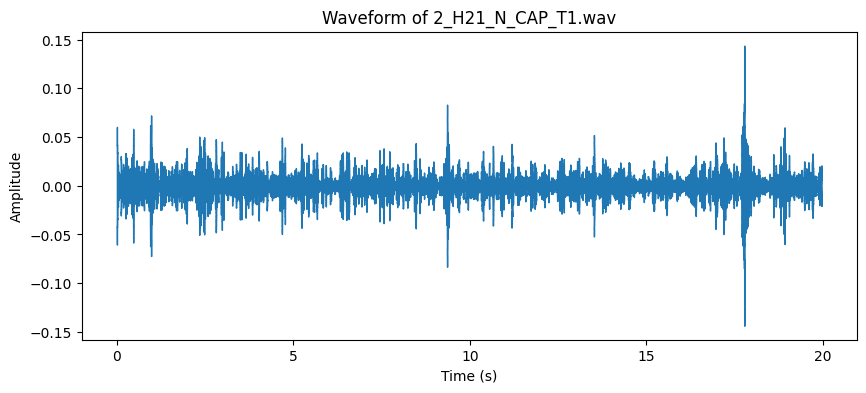

<Figure size 640x480 with 0 Axes>

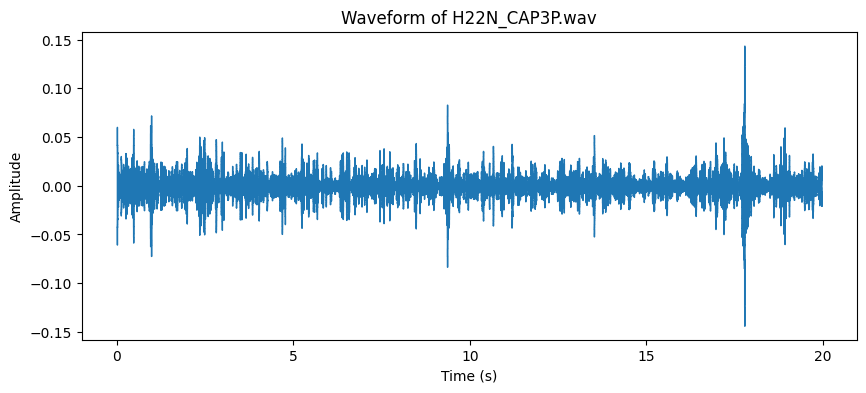

<Figure size 640x480 with 0 Axes>

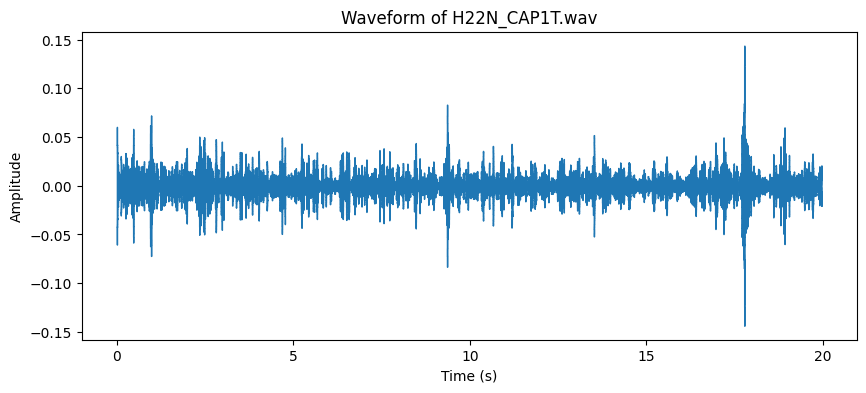

<Figure size 640x480 with 0 Axes>

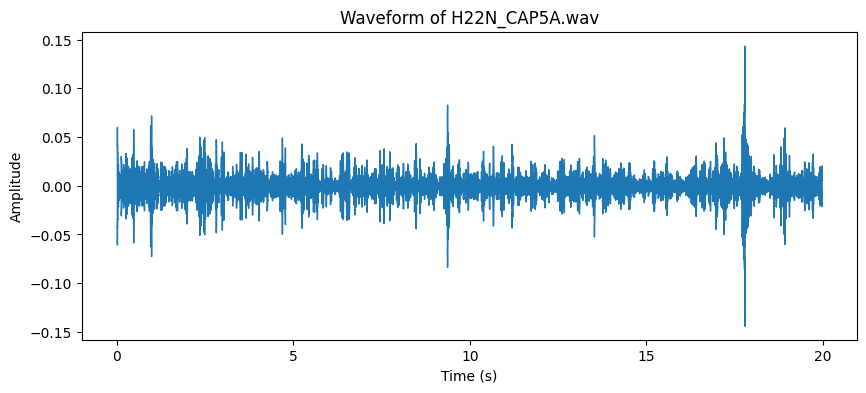

<Figure size 640x480 with 0 Axes>

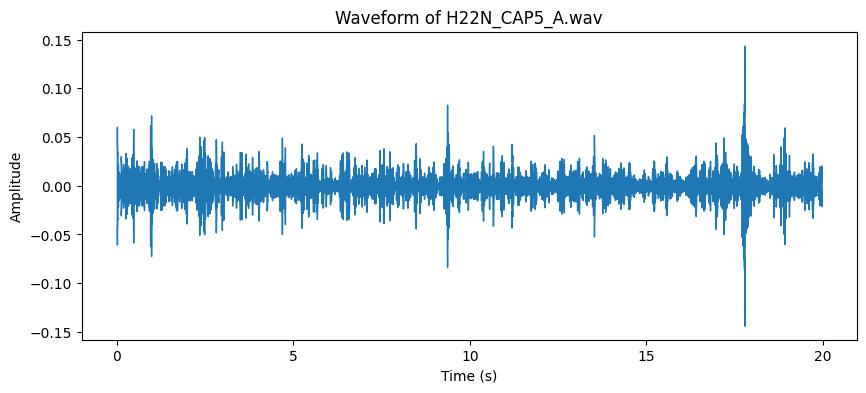

<Figure size 640x480 with 0 Axes>

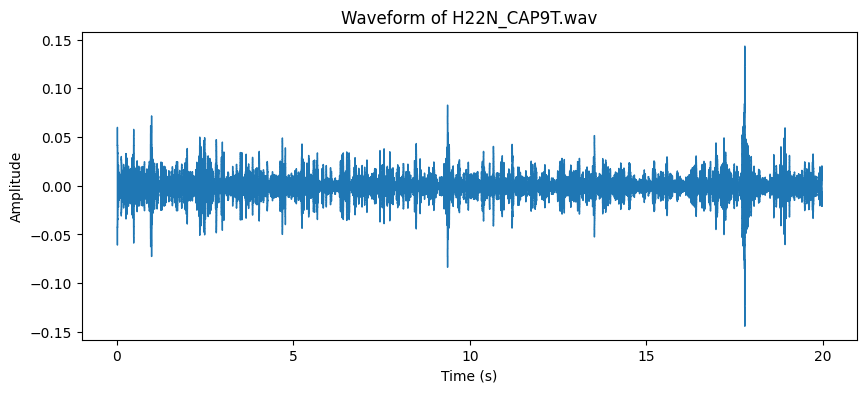

<Figure size 640x480 with 0 Axes>

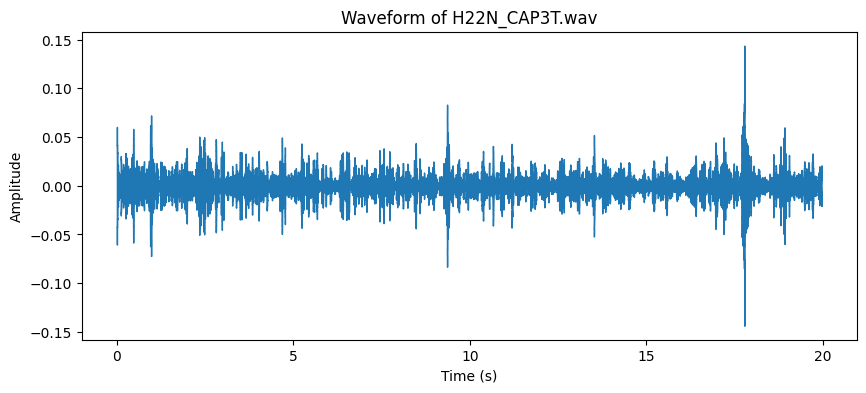

<Figure size 640x480 with 0 Axes>

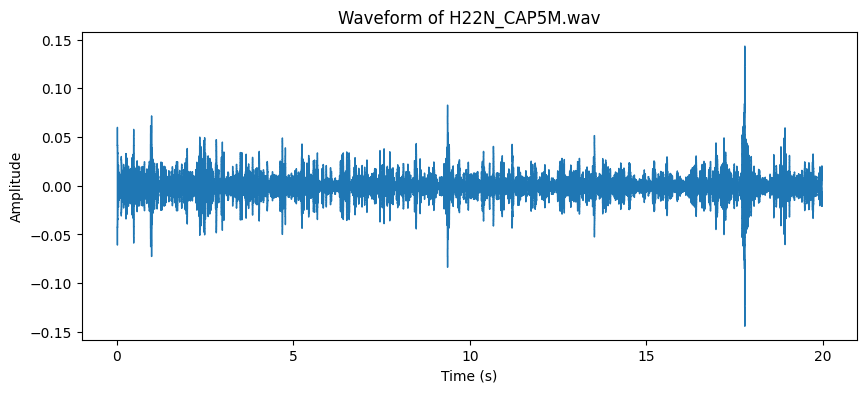

<Figure size 640x480 with 0 Axes>

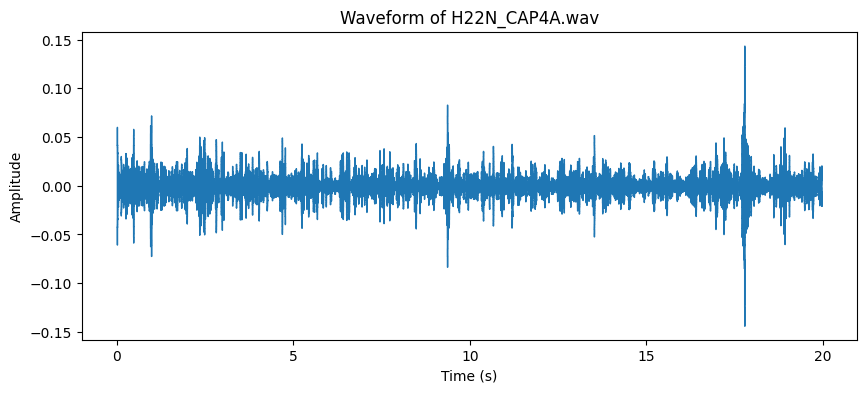

<Figure size 640x480 with 0 Axes>

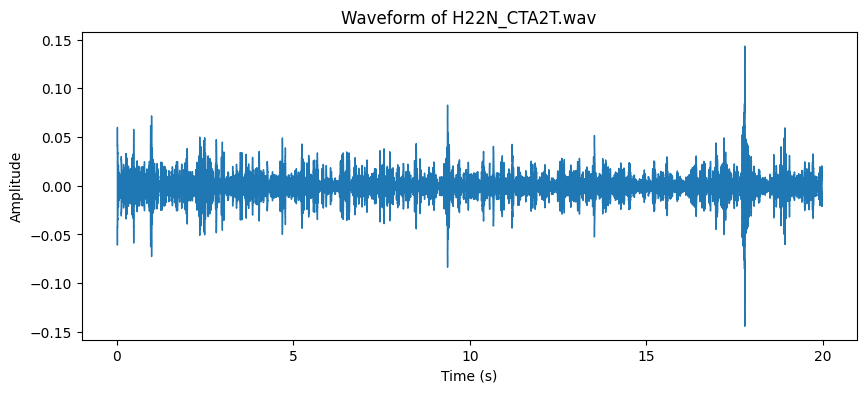

<Figure size 640x480 with 0 Axes>

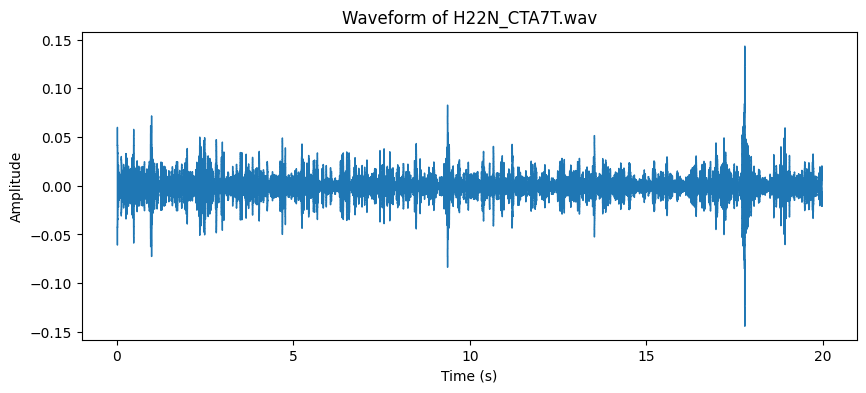

<Figure size 640x480 with 0 Axes>

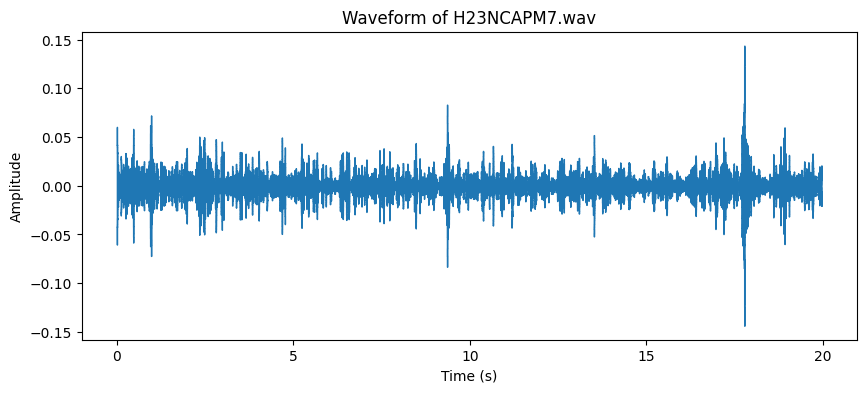

<Figure size 640x480 with 0 Axes>

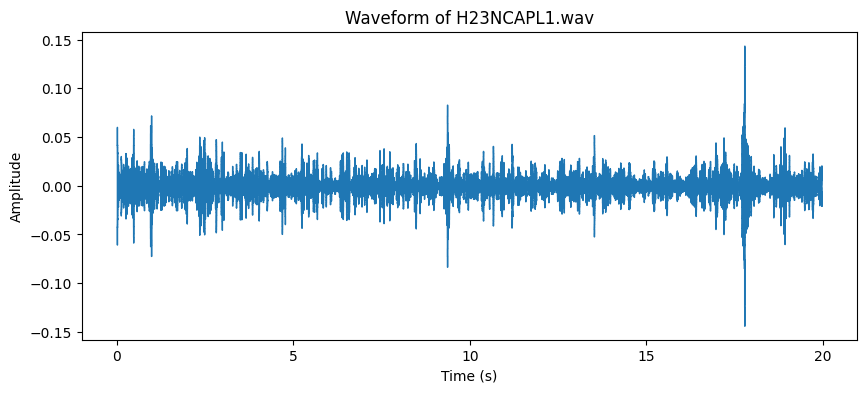

<Figure size 640x480 with 0 Axes>

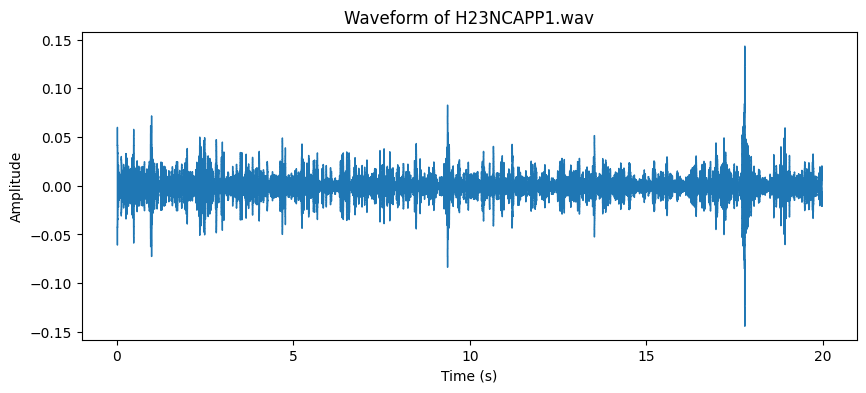

<Figure size 640x480 with 0 Axes>

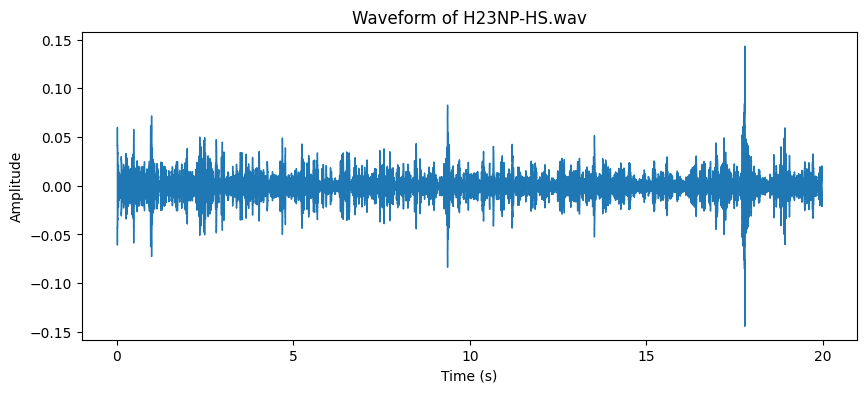

<Figure size 640x480 with 0 Axes>

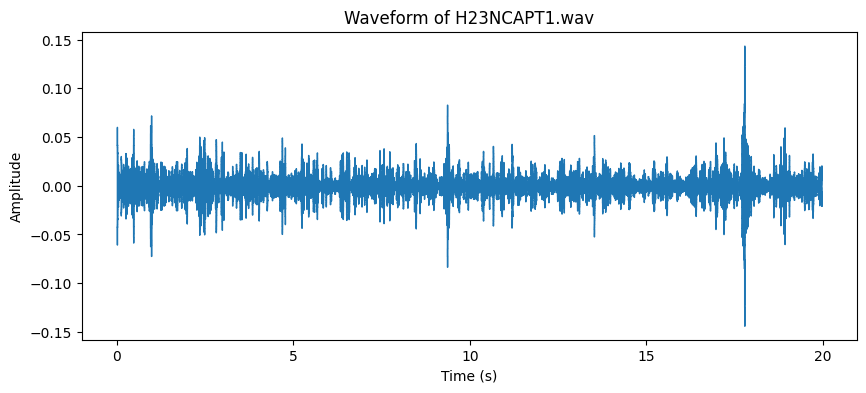

<Figure size 640x480 with 0 Axes>

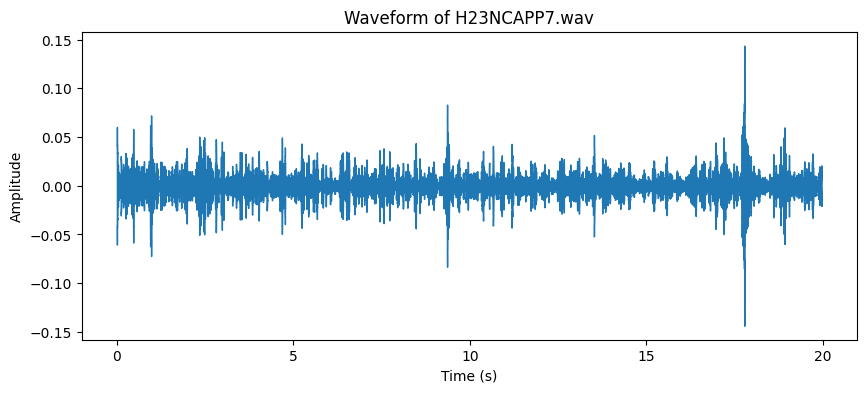

<Figure size 640x480 with 0 Axes>

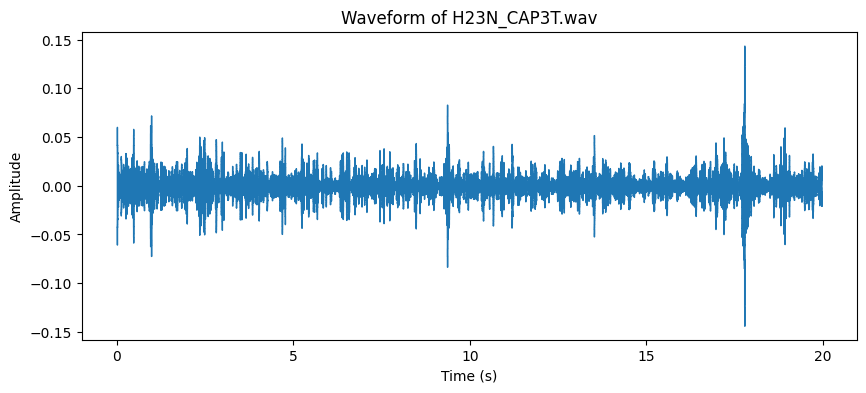

<Figure size 640x480 with 0 Axes>

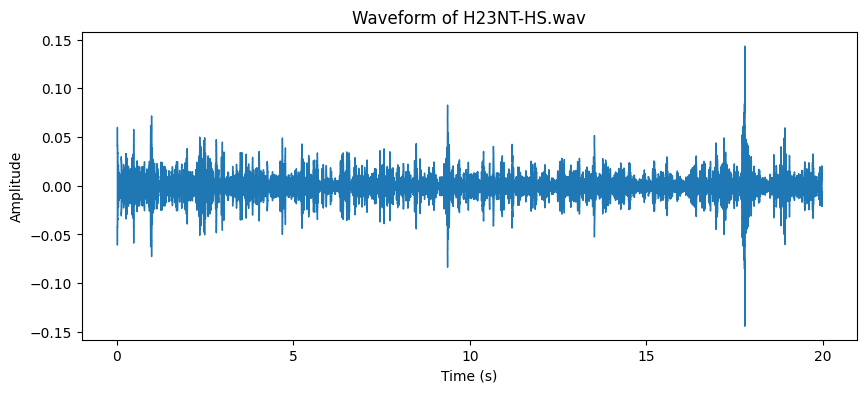

<Figure size 640x480 with 0 Axes>

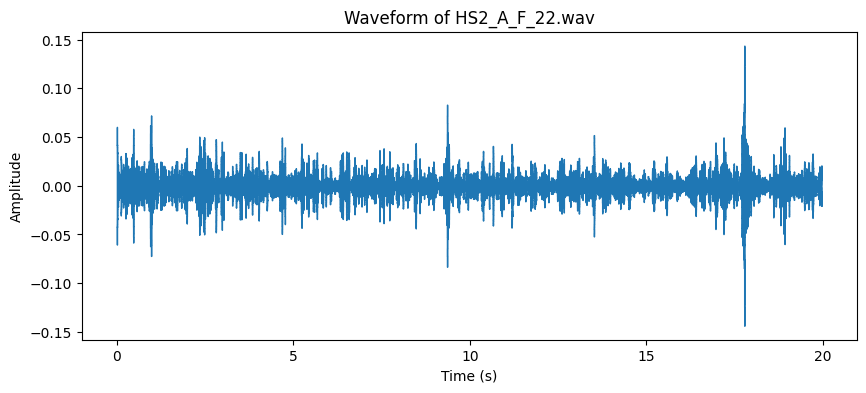

<Figure size 640x480 with 0 Axes>

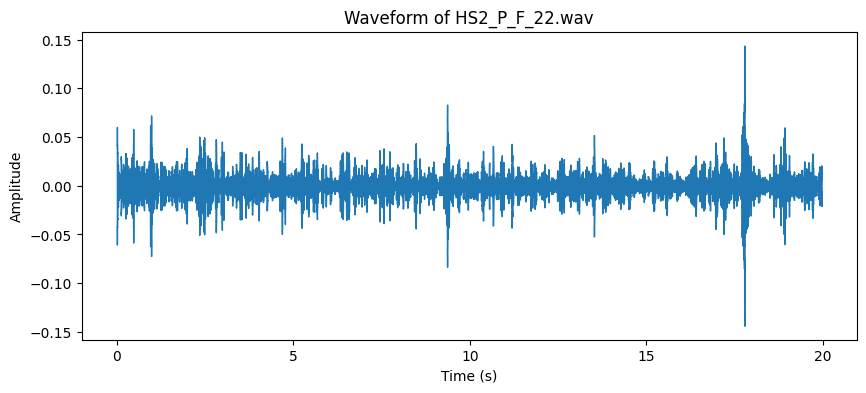

<Figure size 640x480 with 0 Axes>

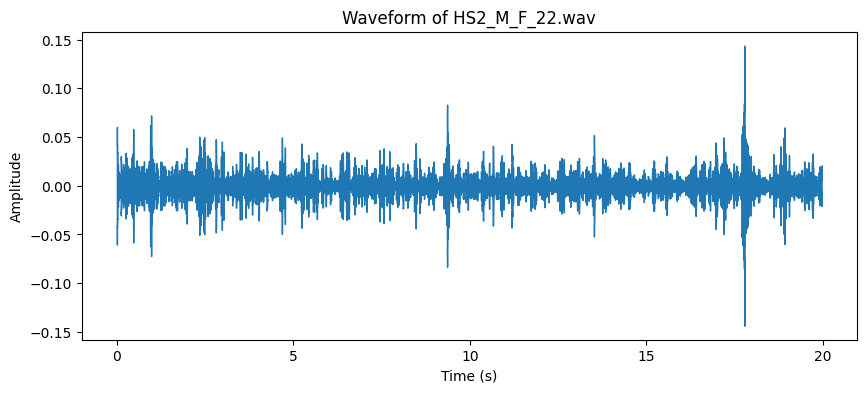

<Figure size 640x480 with 0 Axes>

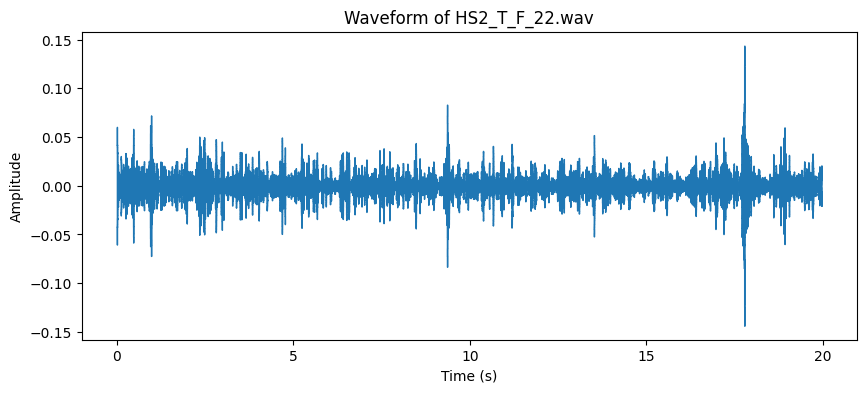

<Figure size 640x480 with 0 Axes>

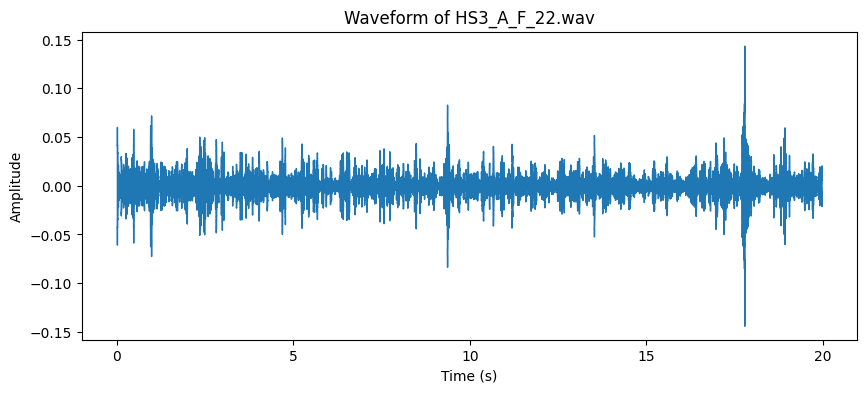

<Figure size 640x480 with 0 Axes>

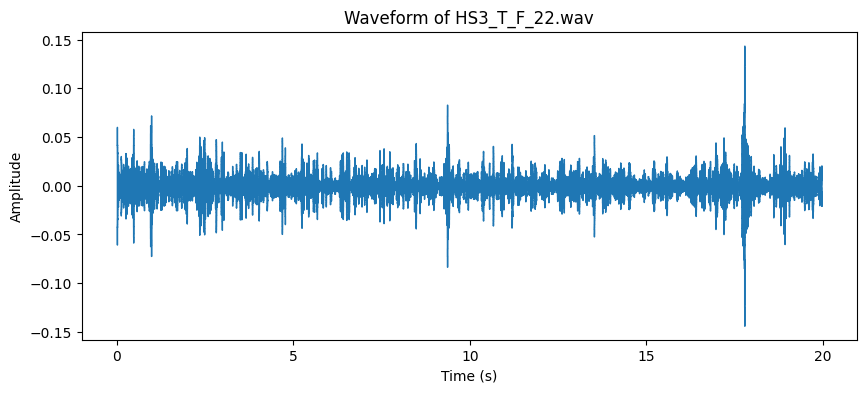

<Figure size 640x480 with 0 Axes>

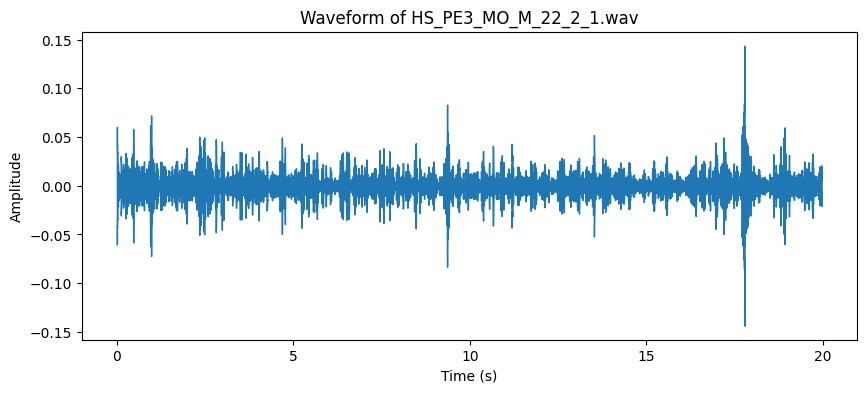

<Figure size 640x480 with 0 Axes>

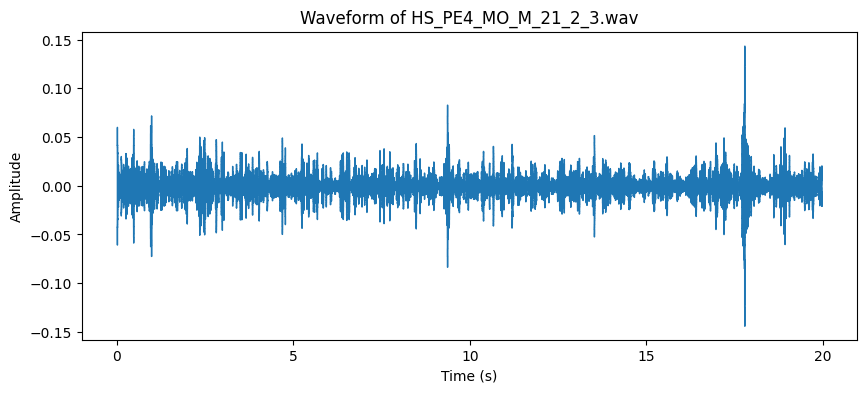

<Figure size 640x480 with 0 Axes>

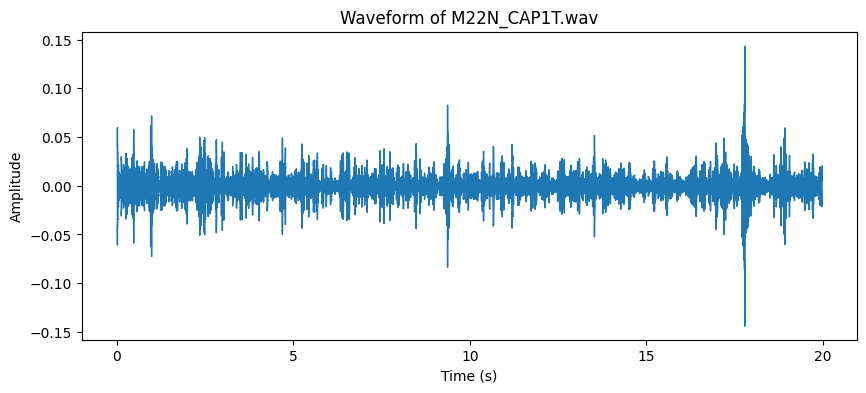

<Figure size 640x480 with 0 Axes>

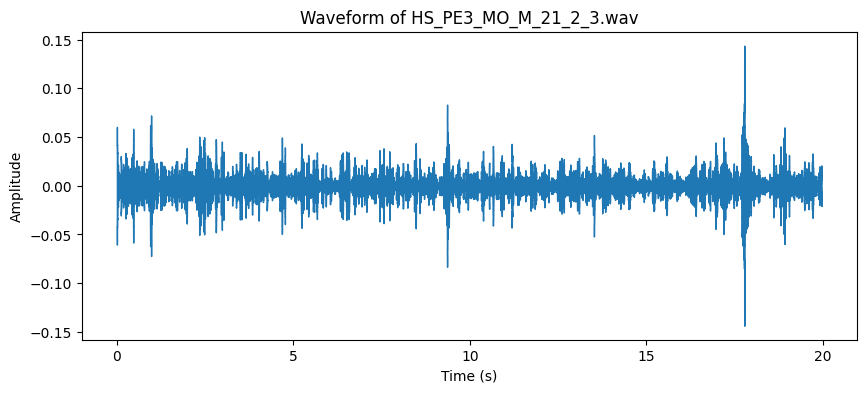

<Figure size 640x480 with 0 Axes>

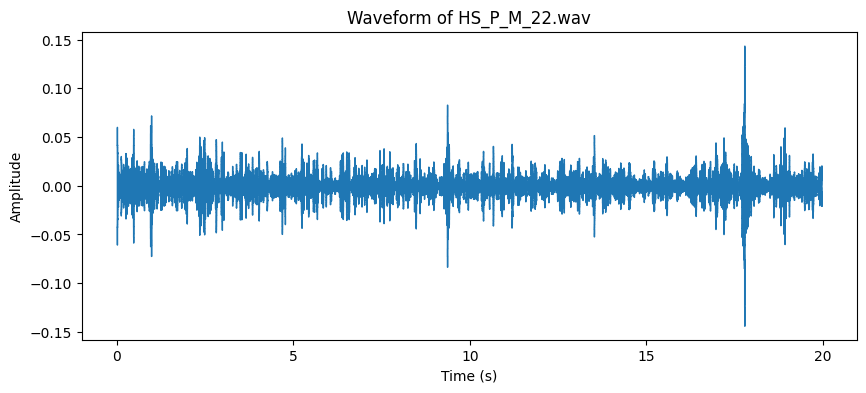

<Figure size 640x480 with 0 Axes>

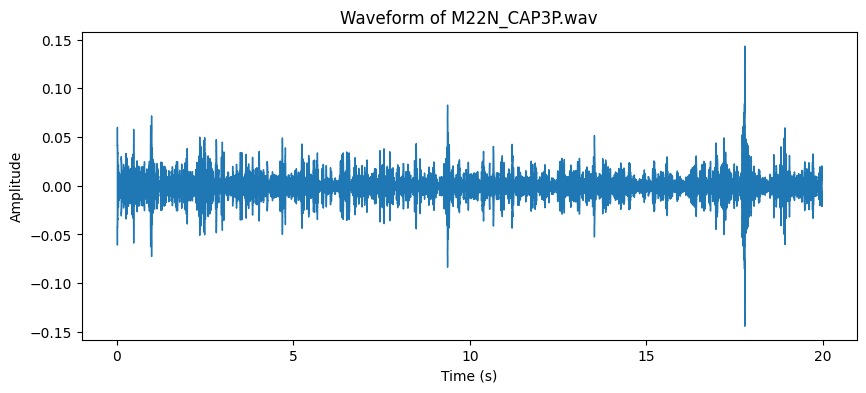

<Figure size 640x480 with 0 Axes>

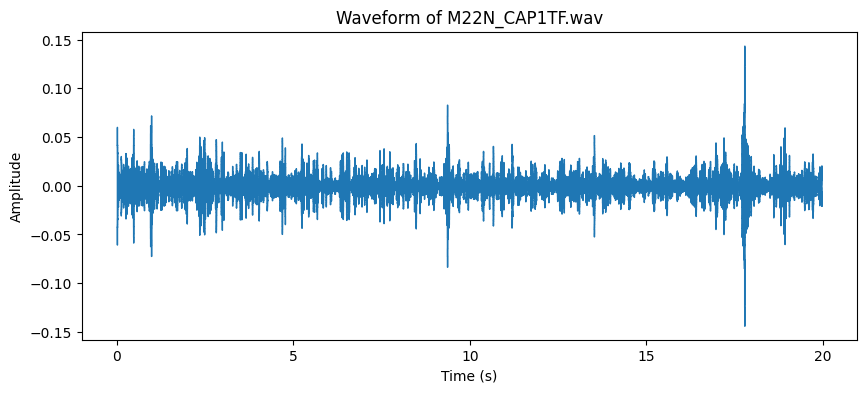

<Figure size 640x480 with 0 Axes>

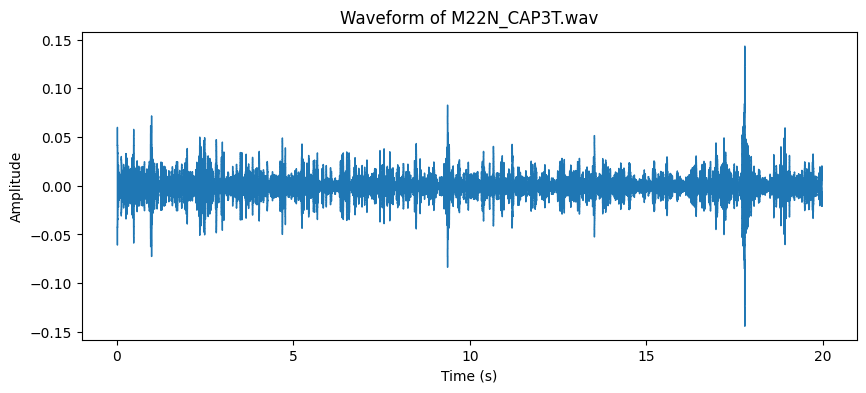

<Figure size 640x480 with 0 Axes>

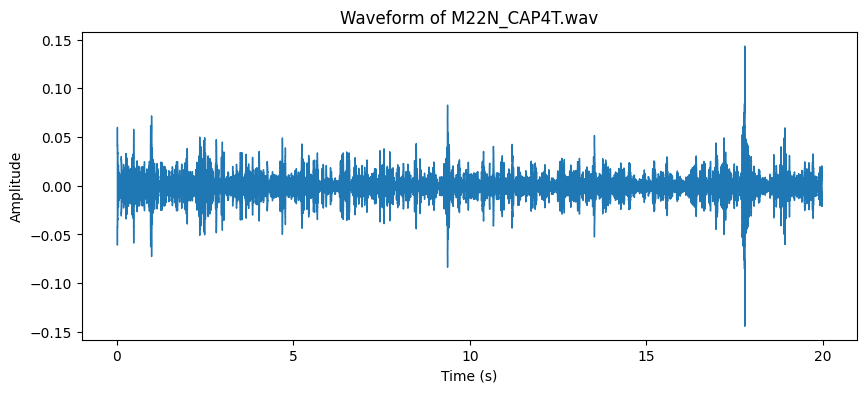

<Figure size 640x480 with 0 Axes>

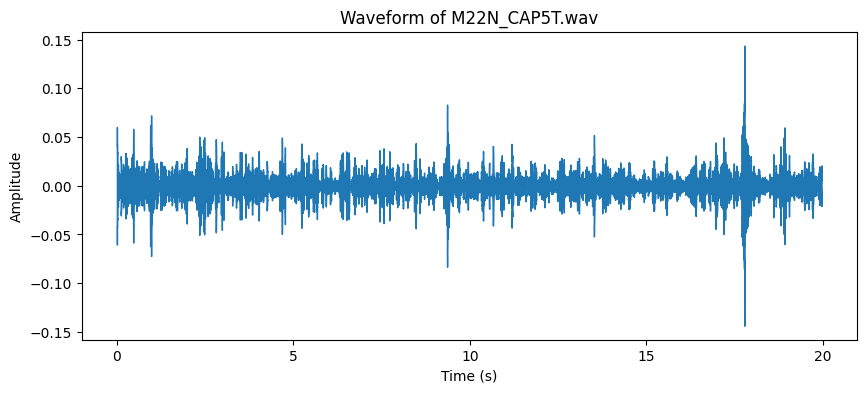

<Figure size 640x480 with 0 Axes>

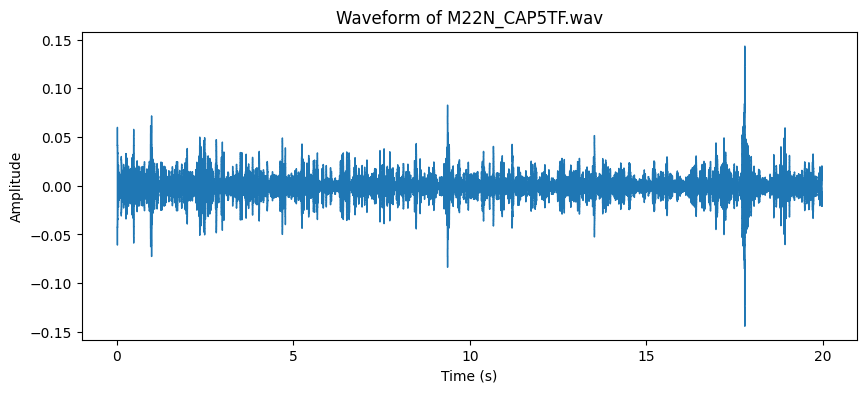

<Figure size 640x480 with 0 Axes>

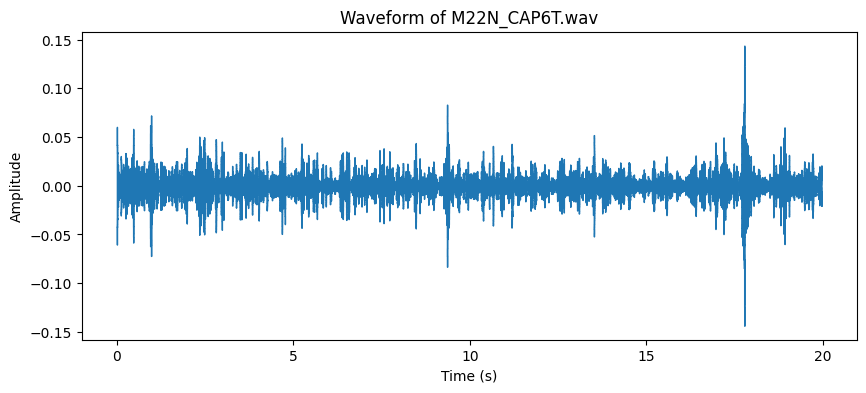

<Figure size 640x480 with 0 Axes>

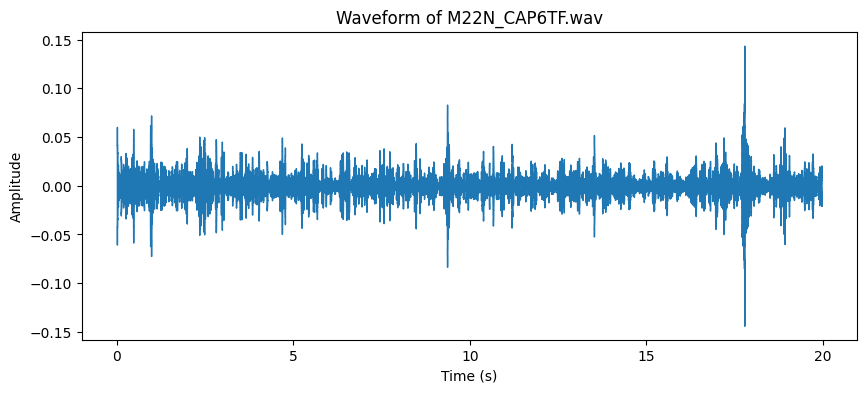

<Figure size 640x480 with 0 Axes>

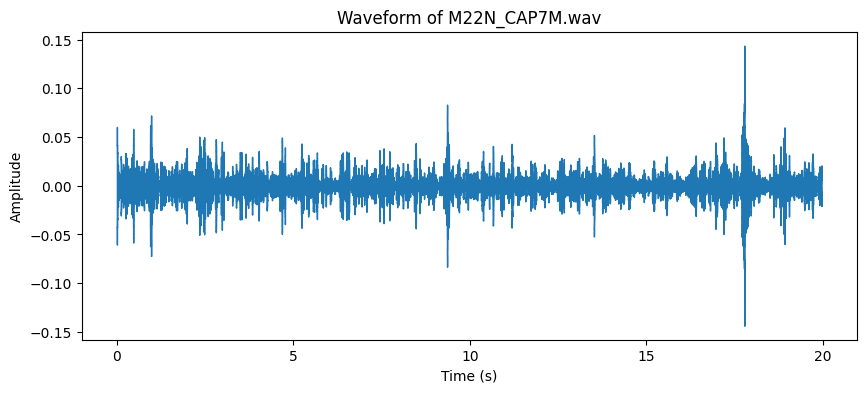

<Figure size 640x480 with 0 Axes>

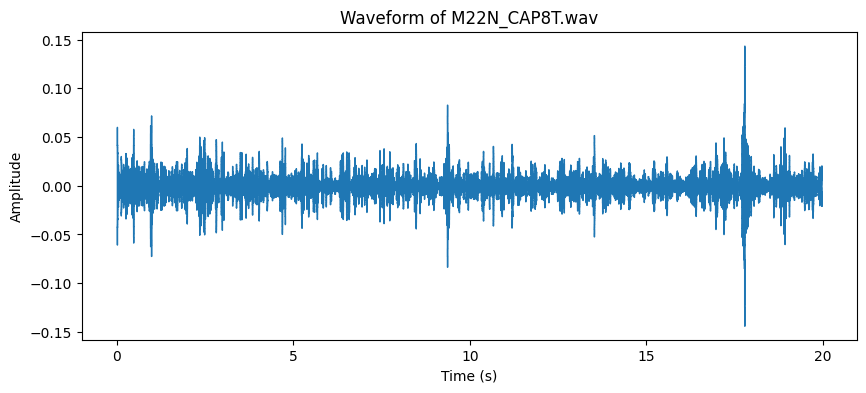

<Figure size 640x480 with 0 Axes>

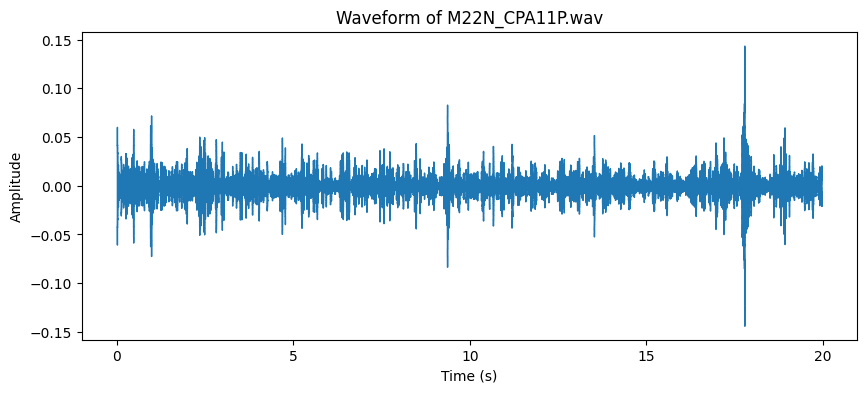

<Figure size 640x480 with 0 Axes>

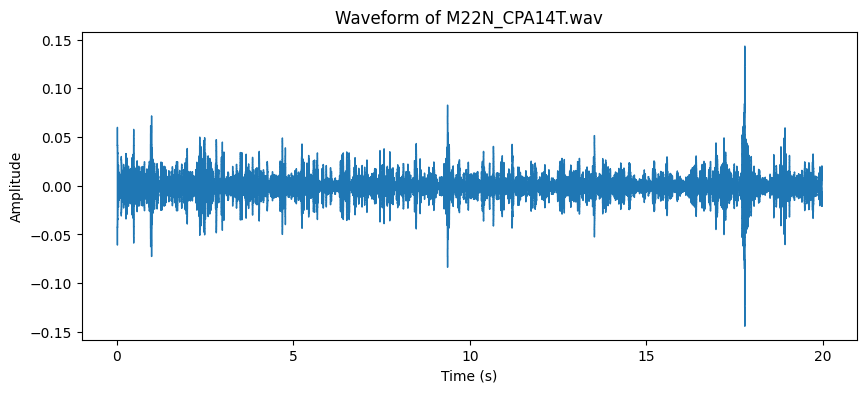

<Figure size 640x480 with 0 Axes>

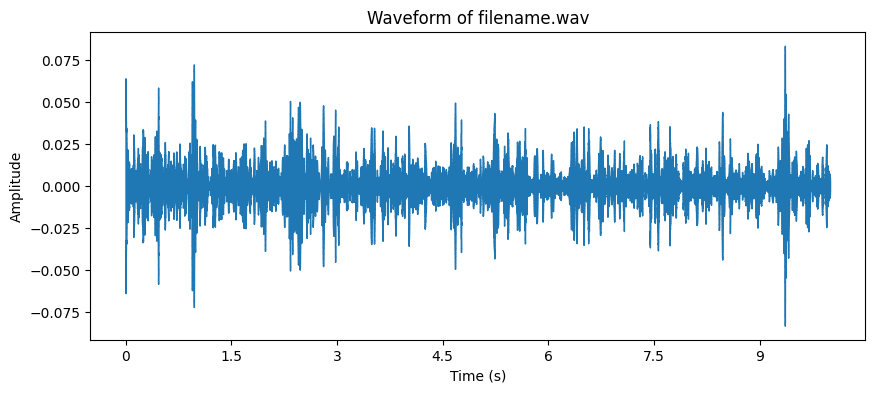

<Figure size 640x480 with 0 Axes>

In [ ]:
import librosa
import os
import librosa.display
import matplotlib.pyplot as plt

# Set the folder path where your audio files are stored
folder_path = '/content/drive/My Drive/HS Cleared Audio'  # Update this to your folder path

# List to store all audio data
all_audio_data = []

# Loop through all audio files in the folder and load them
audio_filenames = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

# Function to plot the waveform of an audio file
def plot_waveform(audio_data, sr, title):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio_data, sr=sr)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Process and plot each audio file individually
for audio_file in audio_filenames:
    file_path = os.path.join(folder_path, audio_file)

    # Load the audio file with the original sample rate
    y, sr = librosa.load(file_path, sr=None)

    # Store the loaded audio data
    all_audio_data.append(y)

    # Plot the waveform for the current audio file
    plot_waveform(y, sr, title=f"Waveform of {audio_file}")

    # Ensure the current figure is cleared before processing the next file
    plt.clf()

print(f"Processed {len(audio_filenames)} audio files.")


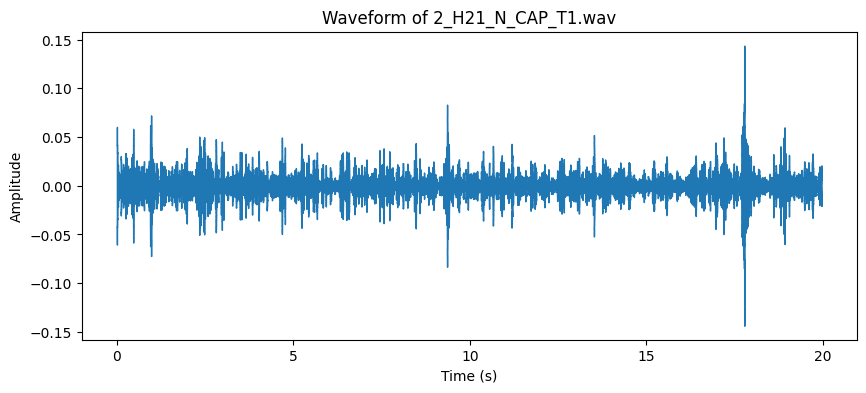

<Figure size 640x480 with 0 Axes>

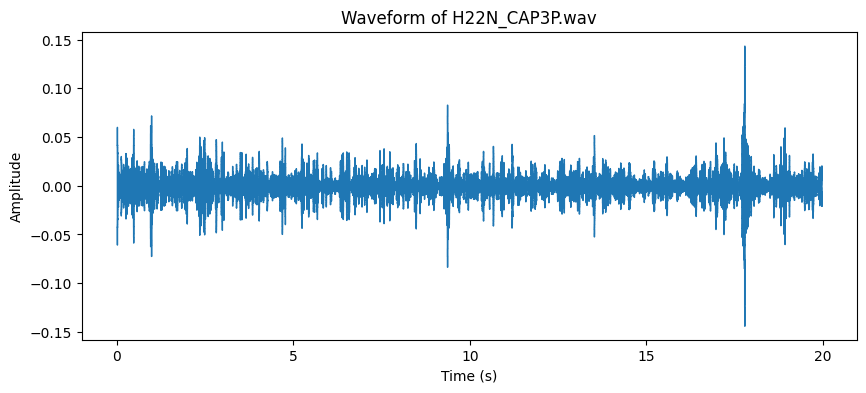

<Figure size 640x480 with 0 Axes>

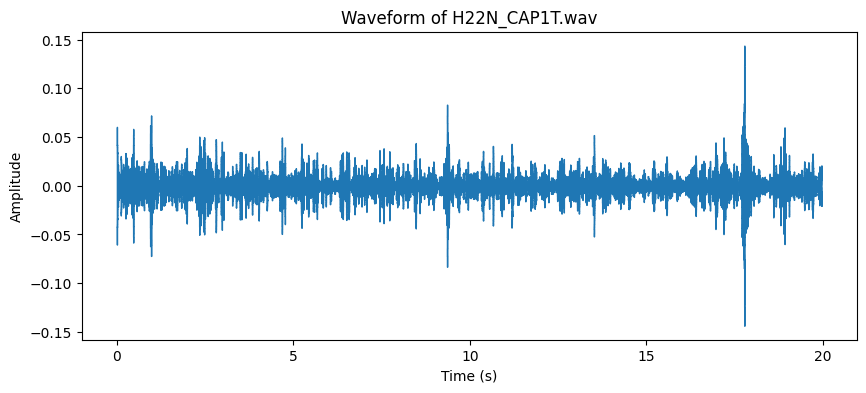

<Figure size 640x480 with 0 Axes>

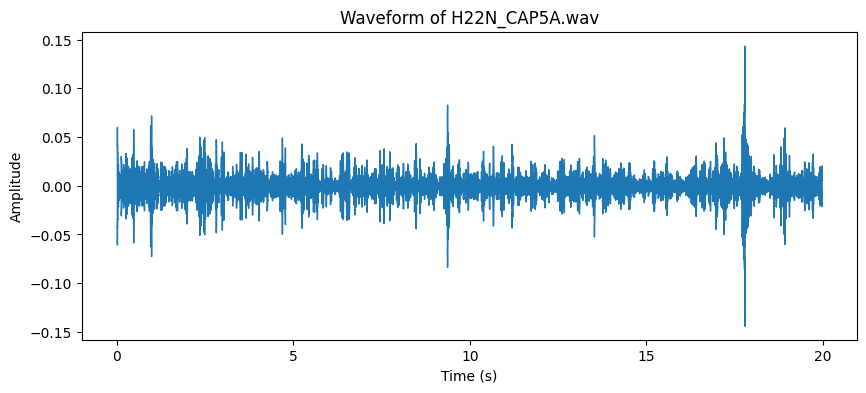

<Figure size 640x480 with 0 Axes>

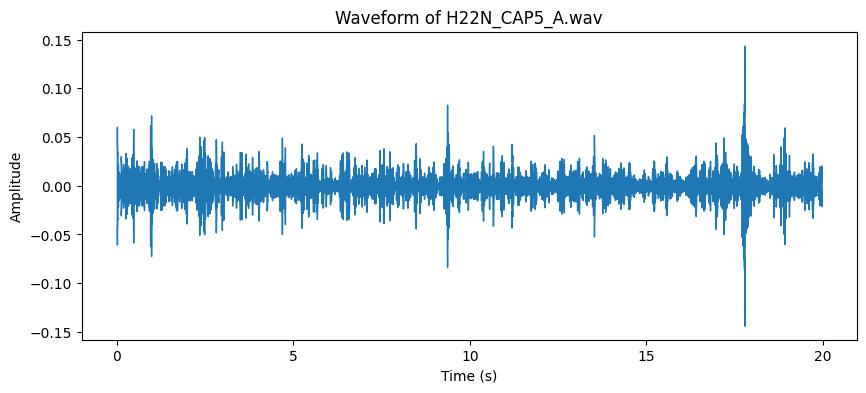

<Figure size 640x480 with 0 Axes>

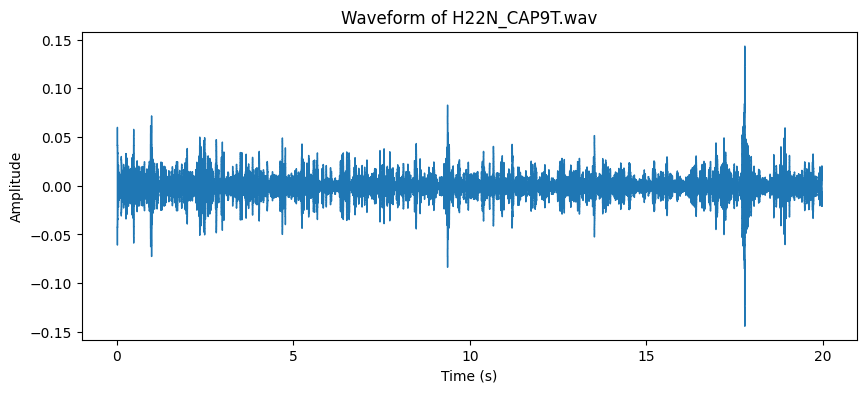

<Figure size 640x480 with 0 Axes>

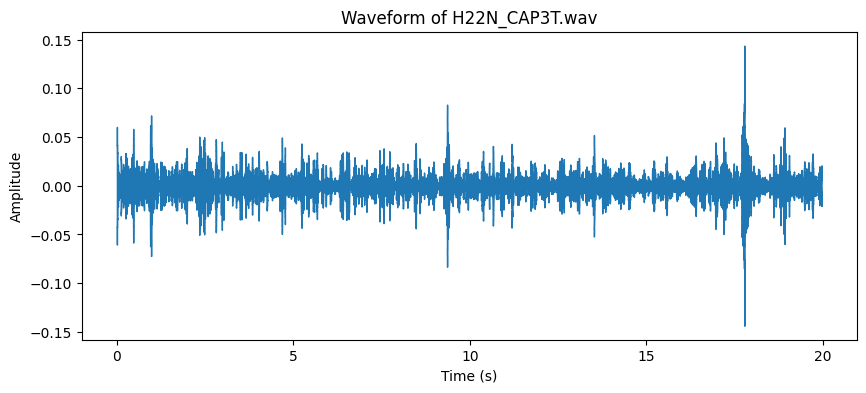

<Figure size 640x480 with 0 Axes>

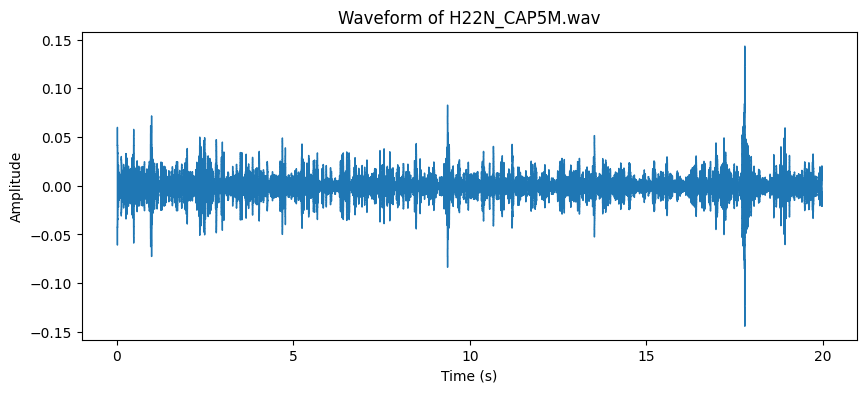

<Figure size 640x480 with 0 Axes>

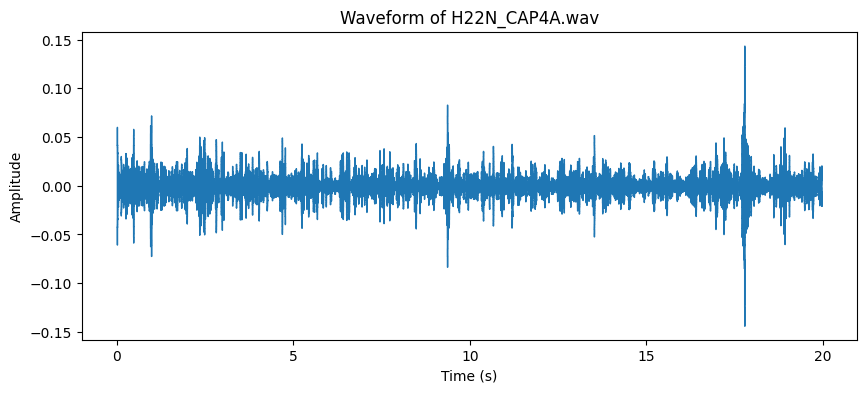

<Figure size 640x480 with 0 Axes>

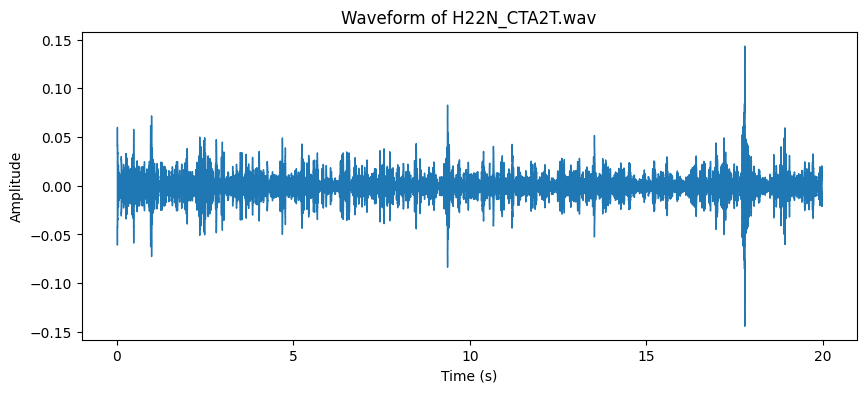

<Figure size 640x480 with 0 Axes>

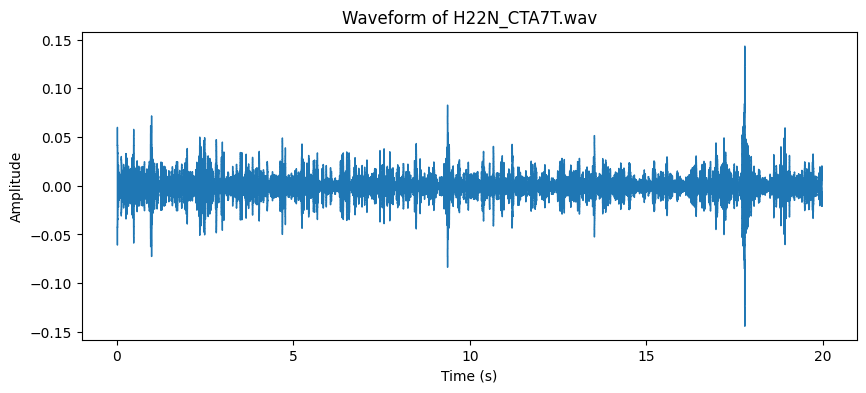

<Figure size 640x480 with 0 Axes>

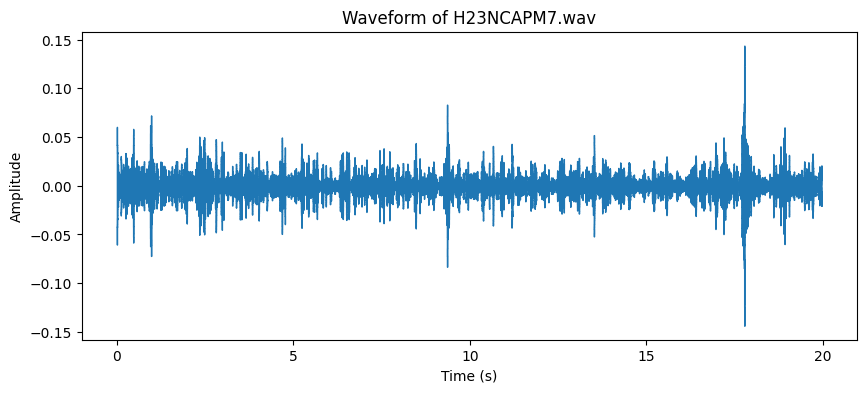

<Figure size 640x480 with 0 Axes>

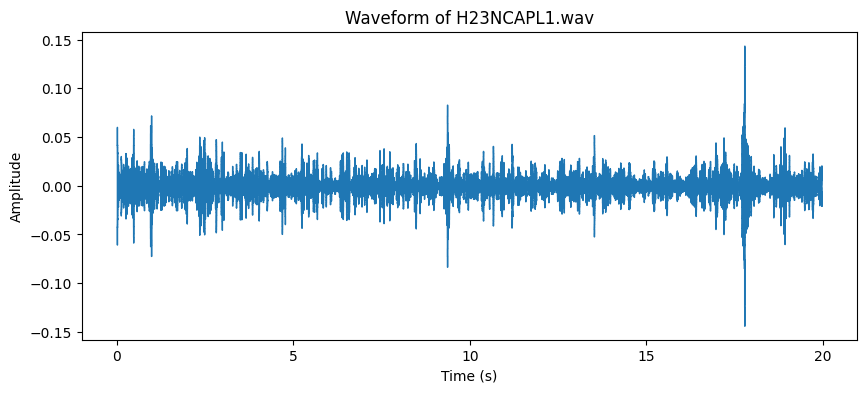

<Figure size 640x480 with 0 Axes>

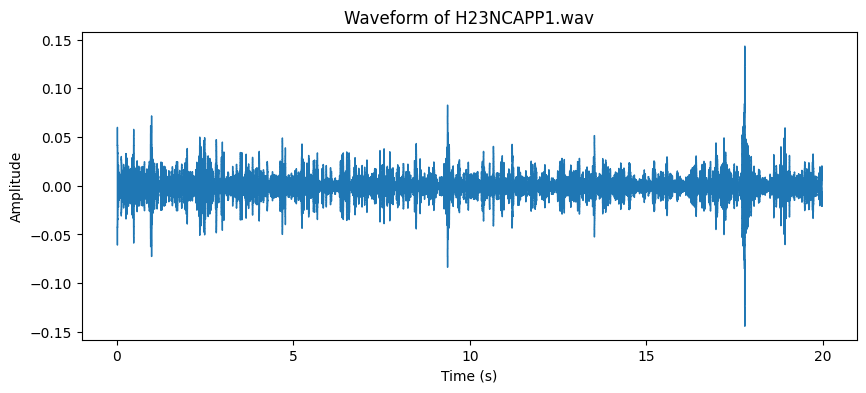

<Figure size 640x480 with 0 Axes>

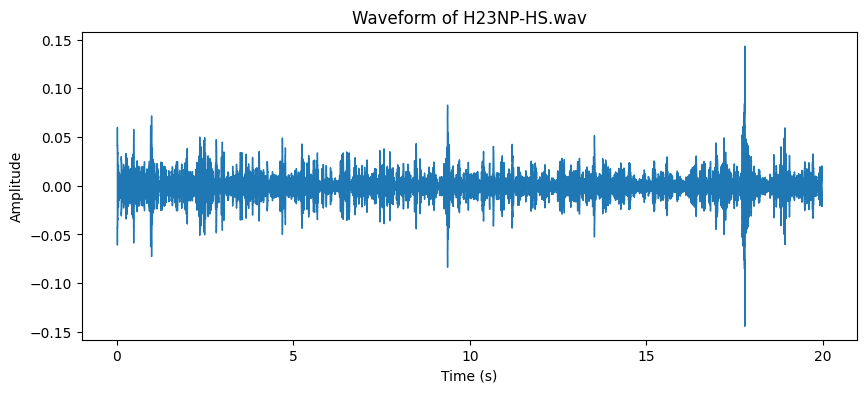

<Figure size 640x480 with 0 Axes>

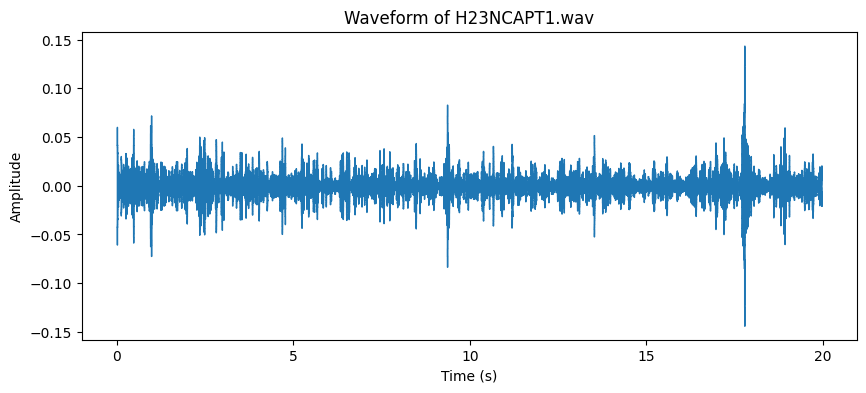

<Figure size 640x480 with 0 Axes>

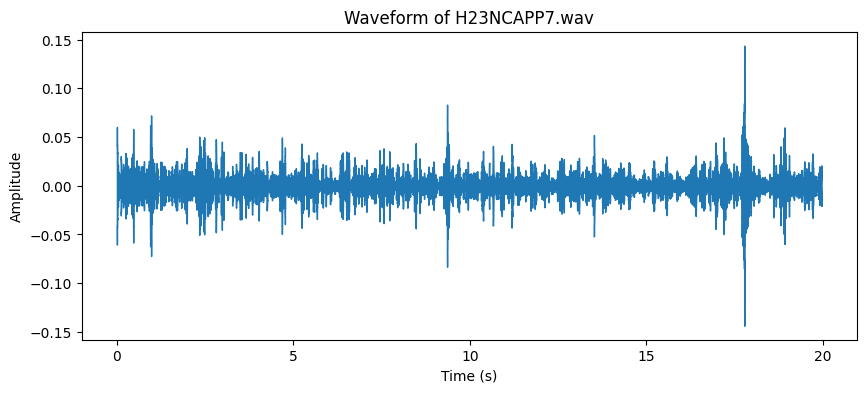

<Figure size 640x480 with 0 Axes>

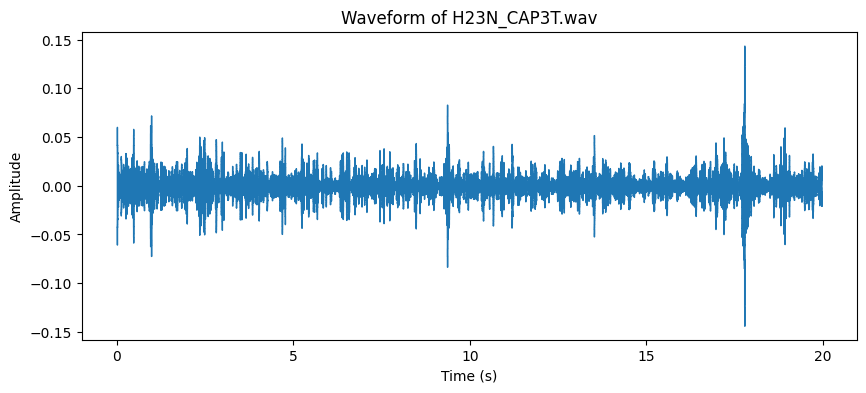

<Figure size 640x480 with 0 Axes>

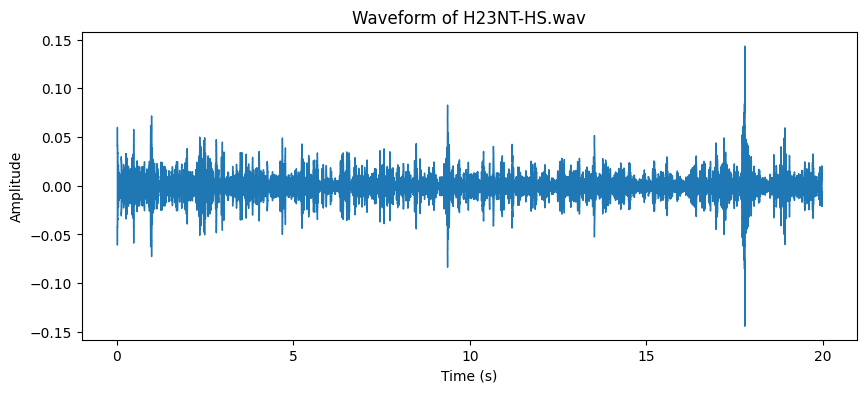

<Figure size 640x480 with 0 Axes>

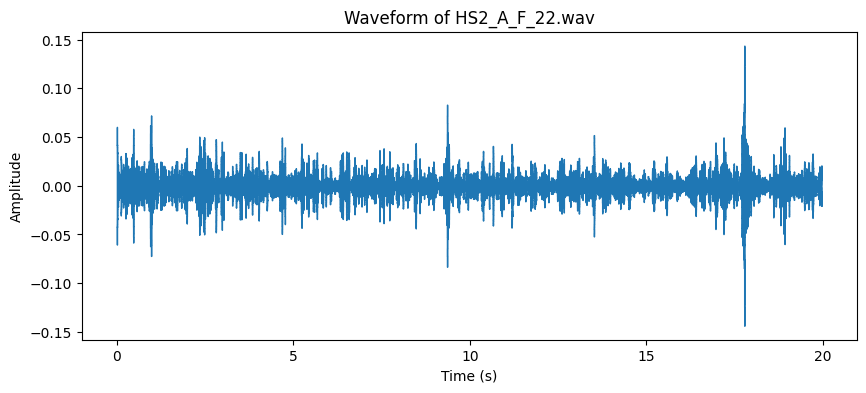

<Figure size 640x480 with 0 Axes>

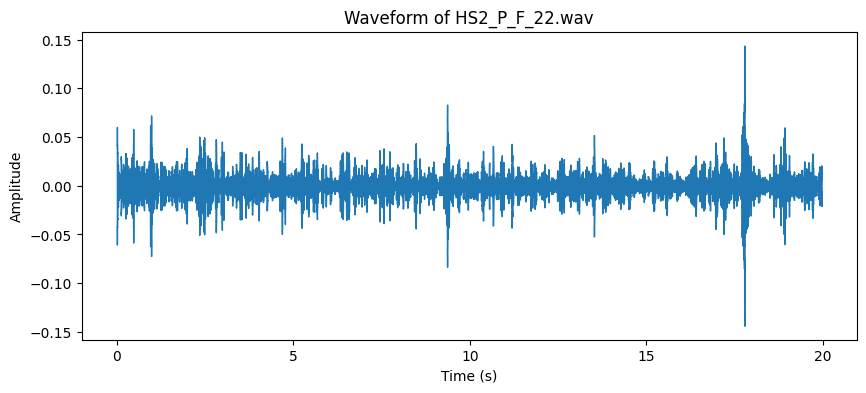

<Figure size 640x480 with 0 Axes>

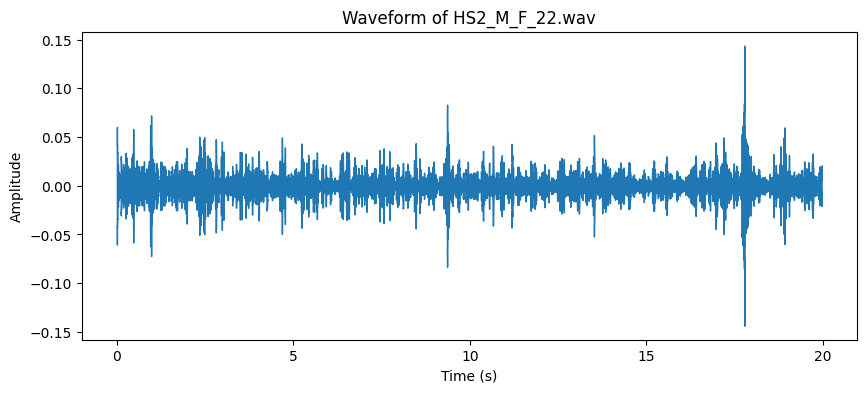

<Figure size 640x480 with 0 Axes>

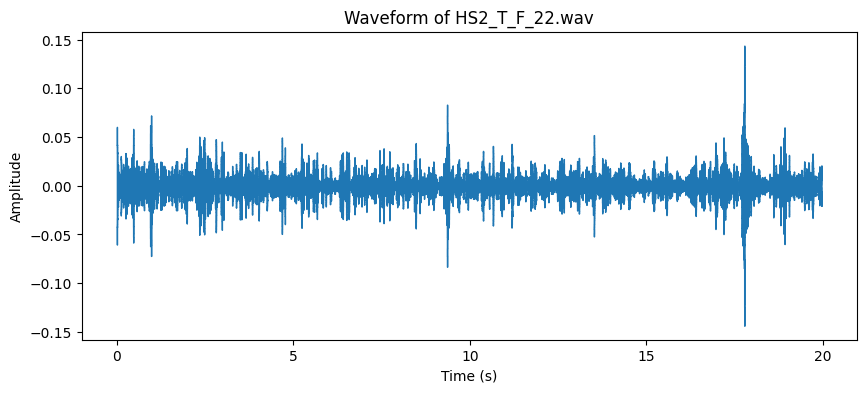

<Figure size 640x480 with 0 Axes>

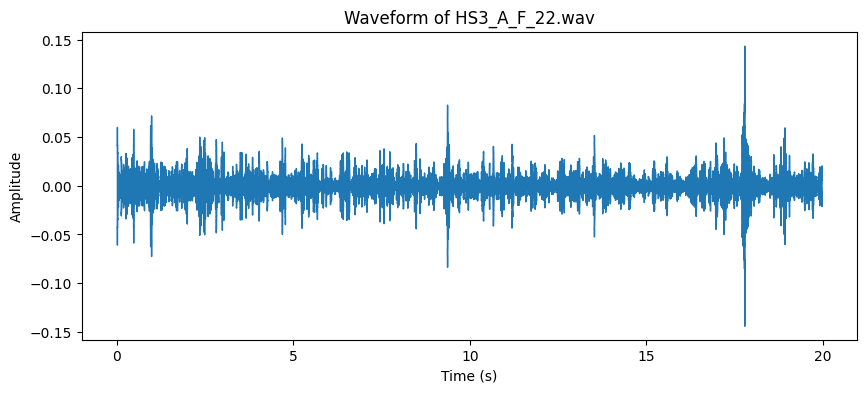

<Figure size 640x480 with 0 Axes>

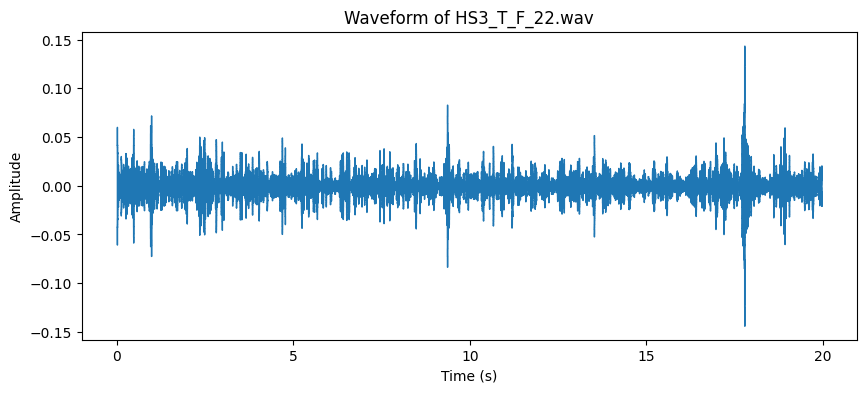

<Figure size 640x480 with 0 Axes>

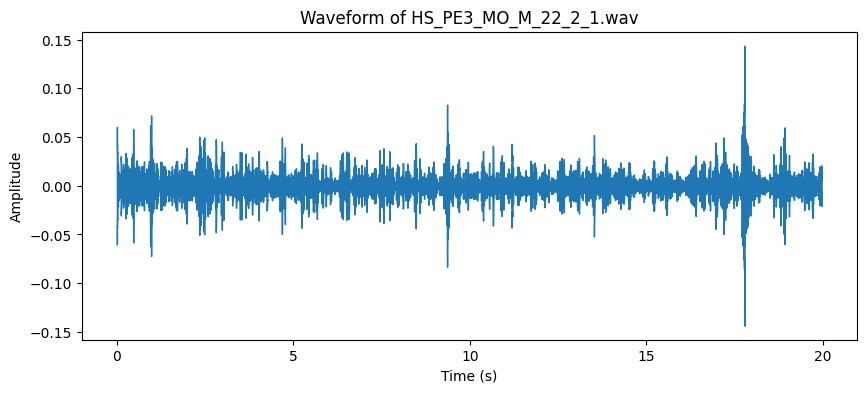

<Figure size 640x480 with 0 Axes>

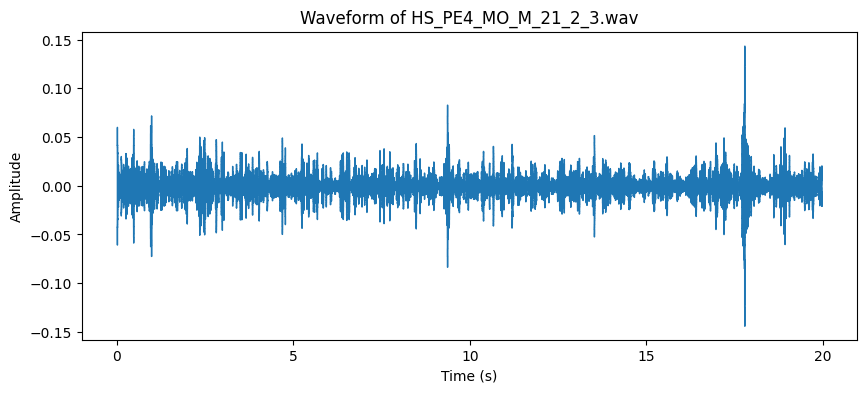

<Figure size 640x480 with 0 Axes>

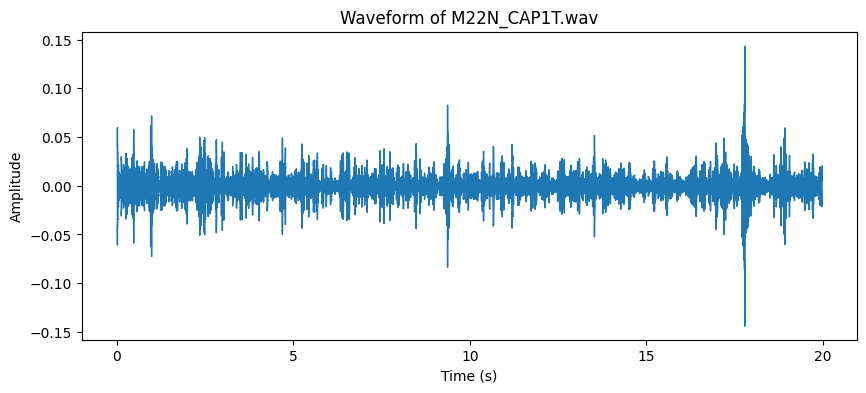

<Figure size 640x480 with 0 Axes>

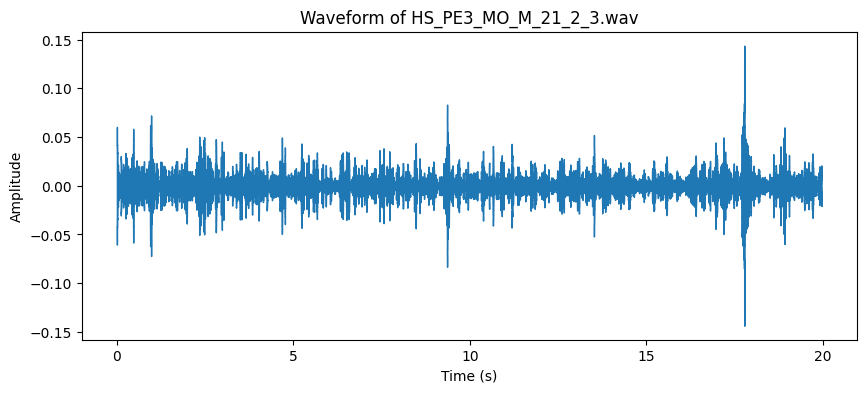

<Figure size 640x480 with 0 Axes>

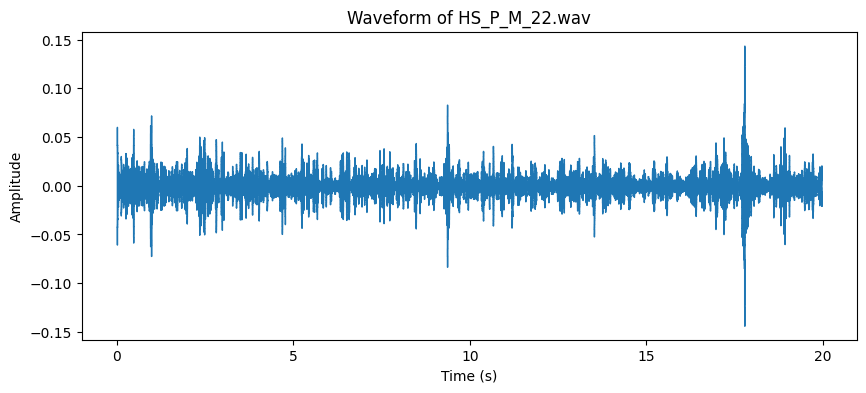

<Figure size 640x480 with 0 Axes>

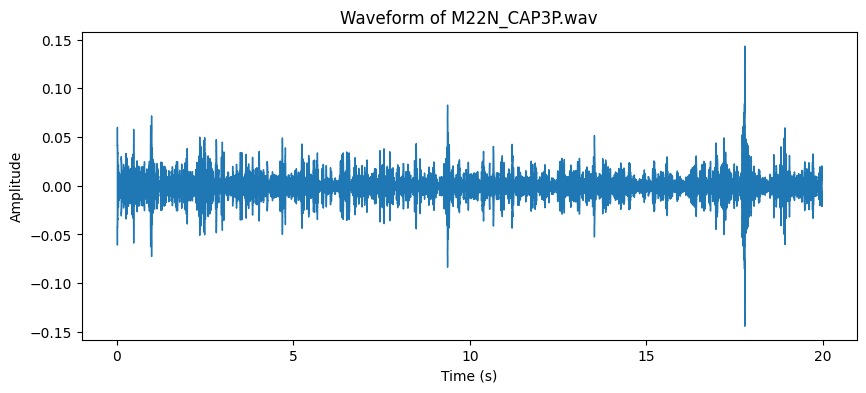

<Figure size 640x480 with 0 Axes>

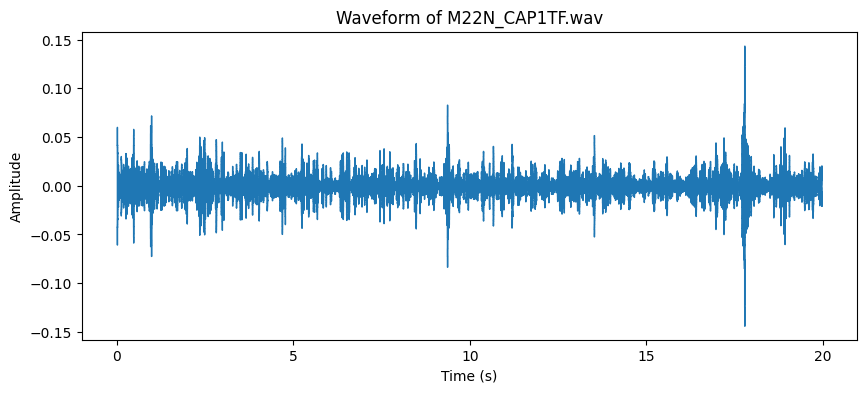

<Figure size 640x480 with 0 Axes>

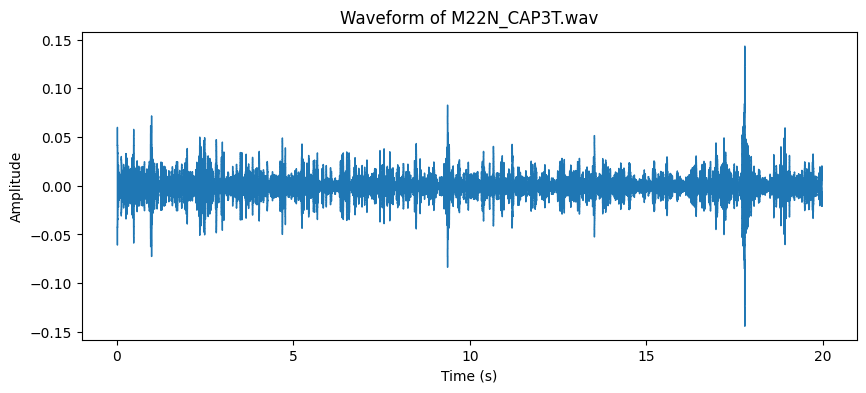

<Figure size 640x480 with 0 Axes>

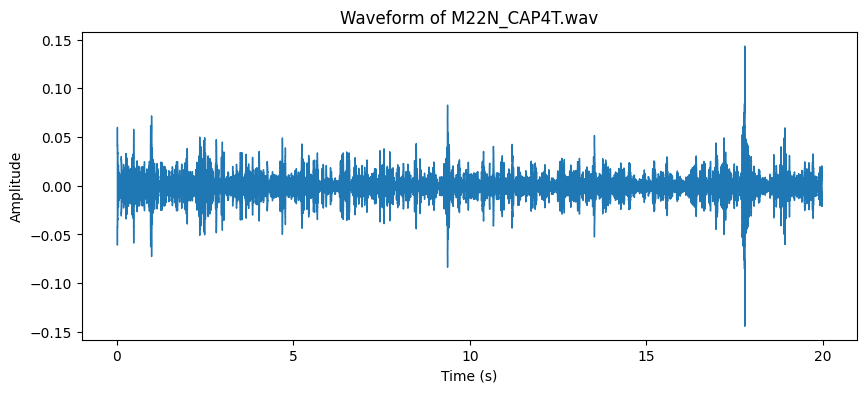

<Figure size 640x480 with 0 Axes>

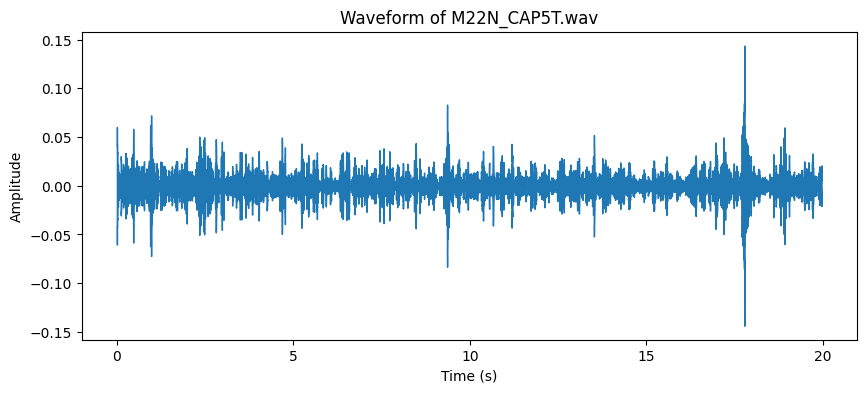

<Figure size 640x480 with 0 Axes>

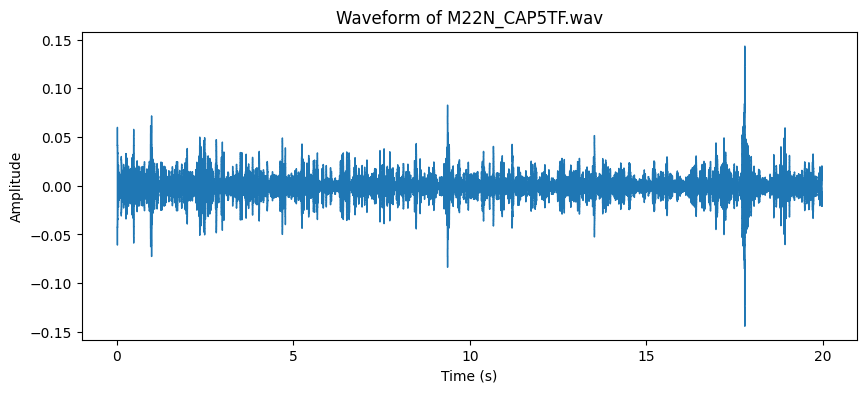

<Figure size 640x480 with 0 Axes>

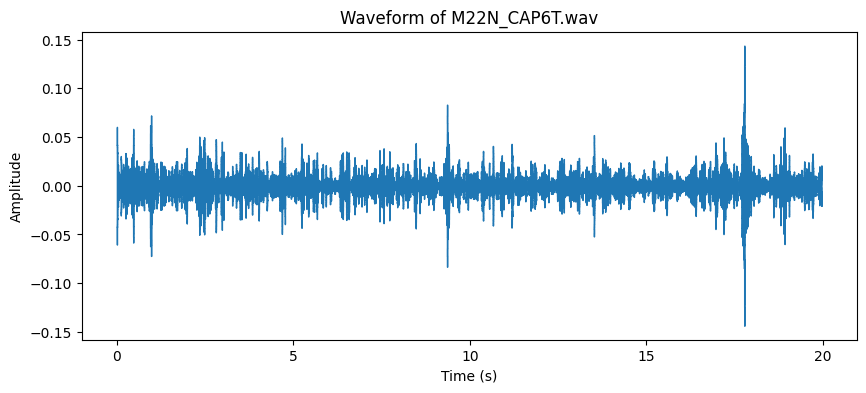

<Figure size 640x480 with 0 Axes>

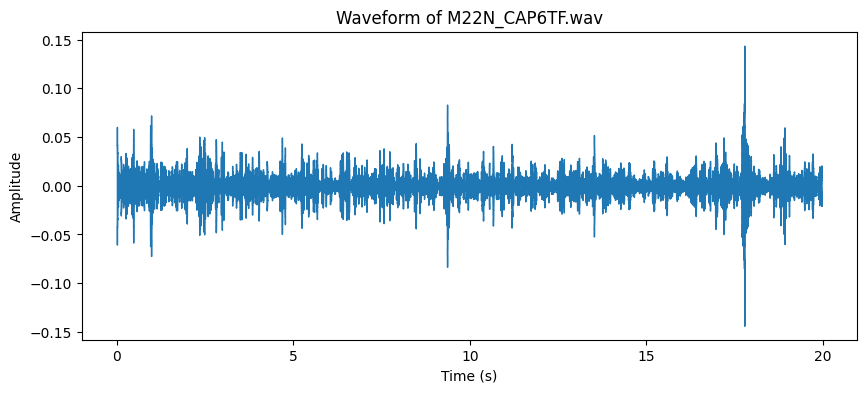

<Figure size 640x480 with 0 Axes>

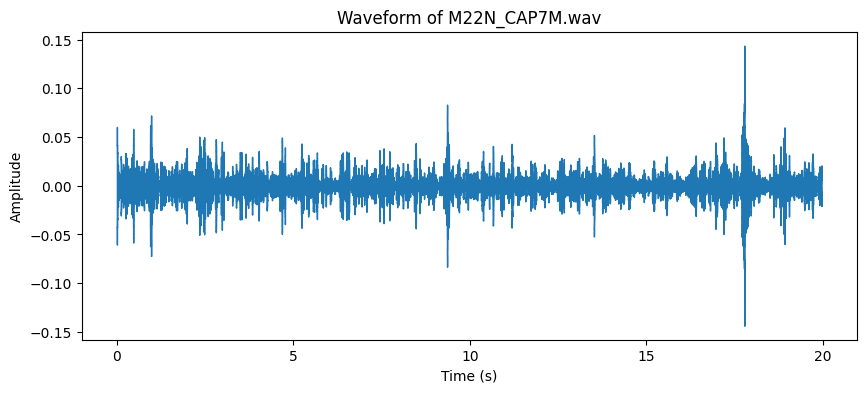

<Figure size 640x480 with 0 Axes>

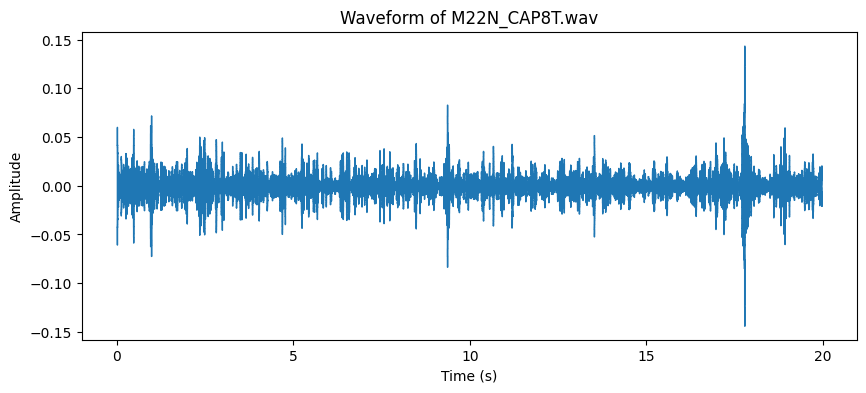

<Figure size 640x480 with 0 Axes>

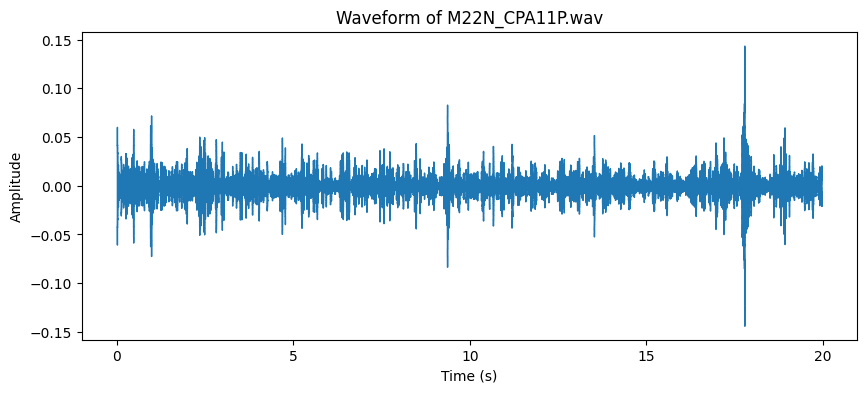

<Figure size 640x480 with 0 Axes>

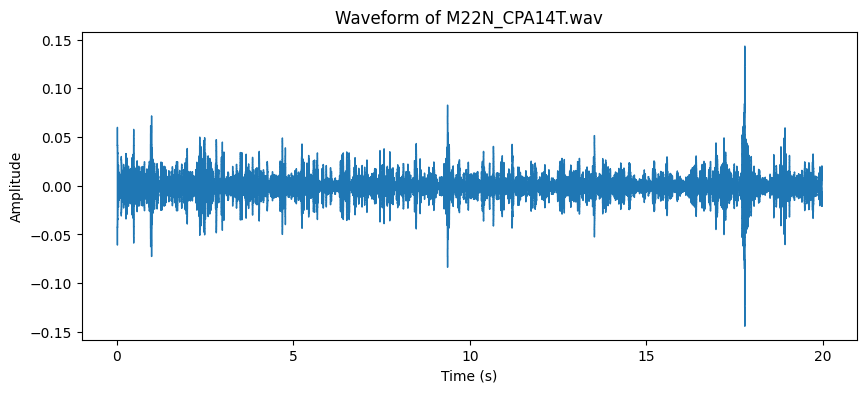

<Figure size 640x480 with 0 Axes>

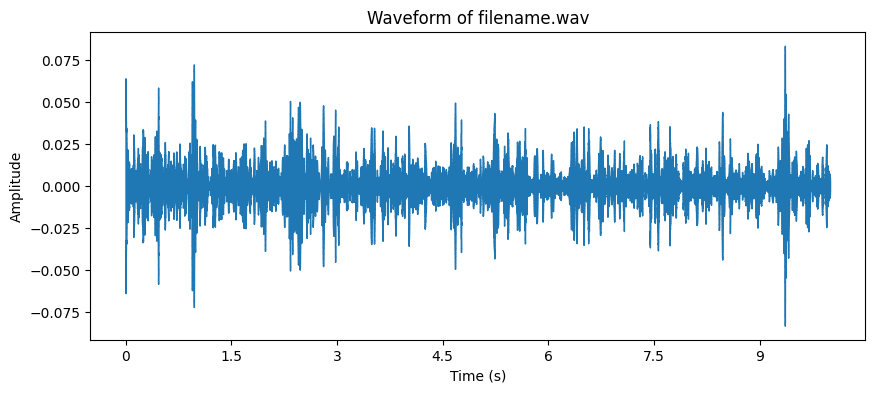

Processed 43 audio files.


<Figure size 640x480 with 0 Axes>

In [ ]:
import librosa
import os
import librosa.display
import matplotlib.pyplot as plt

# Set the folder path where your audio files are stored
folder_path = '/content/drive/My Drive/HS Cleared Audio'  # Update this to your folder path

# Parameters
PARAMETERS = {
    'sample_rate': None,  # Set to None for original sample rate, or a specific value (e.g., 22050)
    'duration': None,     # Set a specific duration (in seconds) if you want to limit the length
    'offset': 0.0,        # Time in seconds to start loading the file
    'trim_silence': False # Whether to trim silence from the audio
}

# Function to plot the waveform of an audio file
def plot_waveform(audio_data, sr, title):
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(audio_data, sr=sr)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# List to store all audio data
all_audio_data = []

# Loop through all audio files in the folder and load them
audio_filenames = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

for audio_file in audio_filenames:
    file_path = os.path.join(folder_path, audio_file)

    # Load the audio file with parameters
    y, sr = librosa.load(
        file_path,
        sr=PARAMETERS['sample_rate'],  # Control the sample rate
        duration=PARAMETERS['duration'],  # Limit the duration if specified
        offset=PARAMETERS['offset']  # Start at the specified offset
    )

    # Optionally trim silence from the beginning and end of the audio
    if PARAMETERS['trim_silence']:
        y, _ = librosa.effects.trim(y)

    # Store the loaded audio data
    all_audio_data.append(y)

    # Plot the waveform for the current audio file
    plot_waveform(y, sr, title=f"Waveform of {audio_file}")

    # Ensure the current figure is cleared before processing the next file
    plt.clf()

print(f"Processed {len(audio_filenames)} audio files.")
